In [99]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns


In [100]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/colesprouse/Desktop/Projects/Personal Projects/sports_modeling/cbb-model-405016-3188661ed0c3.json"

In [3]:
pip install google-cloud-bigquery
pip install db-dtypes


  Obtaining dependency information for google-cloud-bigquery from https://files.pythonhosted.org/packages/51/8c/bf168c5450431734d67ed4db3e62e2c81fbf2c7d8c0ff3153808e9ab480f/google_cloud_bigquery-3.13.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for grpcio<2.0dev,>=1.47.0 from https://files.pythonhosted.org/packages/da/23/cf7f605f9a87ebcc03a677477d6ba0d012be466d1491c360e52264e33672/grpcio-1.59.2-cp311-cp311-macosx_10_10_universal2.whl.metadata
  Obtaining dependency information for google-api-core[grpc]!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.0,<3.0.0dev,>=1.31.5 from https://files.pythonhosted.org/packages/c4/1e/924dcad4725d2e697888e044edf7a433db84bf9a3e40d3efa38ba859d0ce/google_api_core-2.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for proto-plus<2.0.0dev,>=1.15.0 from https://files.pythonhosted.org/packages/36/5b/e02636d221917d6fa2a61289b3f16002eb4c93d51c0191ac8e896d527182/proto_plus-1.22.3-py3-none-any.whl.metadata
  Obtaining dependency information 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.3/183.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.9/230.9 kB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [101]:
from google.cloud import bigquery

client = bigquery.Client()

# Construct a reference to the dataset
dataset_ref = client.dataset("ncaa_basketball", project="bigquery-public-data")

# Construct a reference to the table
table_ref = dataset_ref.table("mbb_games_sr")

# API request - fetch the table
table = client.get_table(table_ref)

# Convert to DataFrame
games_data = client.list_rows(table, max_results=10).to_dataframe()


In [5]:
games_data.columns

Index(['game_id', 'season', 'status', 'coverage', 'neutral_site',
       'scheduled_date', 'gametime', 'conference_game', 'tournament',
       'tournament_type',
       ...
       'a_fast_break_pts', 'a_second_chance_pts', 'a_team_turnovers',
       'a_points_off_turnovers', 'a_team_rebounds', 'a_flagrant_fouls',
       'a_player_tech_fouls', 'a_team_tech_fouls', 'a_coach_tech_fouls',
       'created'],
      dtype='object', length=132)

In [7]:
dataset = client.get_dataset(dataset_ref)

tables = list(client.list_tables(dataset))

for table in tables:  
    print(table.table_id)


mascots
mbb_games_sr
mbb_historical_teams_games
mbb_historical_teams_seasons
mbb_historical_tournament_games
mbb_pbp_sr
mbb_players_games_sr
mbb_teams
mbb_teams_games_sr
team_colors


In [209]:
from google.cloud import bigquery

# Construct a BigQuery client object.
client = bigquery.Client()

# Set the dataset reference
dataset_ref = client.dataset("ncaa_basketball", project="bigquery-public-data")

# Get the list of available tables
tables = list(client.list_tables(dataset_ref))
print("Tables contained in '{}':".format(dataset_ref.dataset_id))
for table in tables:  
    print(table.table_id)

# Function to get the schema of a specified table
def get_table_schema(table_id):
    table_ref = dataset_ref.table(table_id)
    table = client.get_table(table_ref)
    return table.schema

# Function to preview the first few rows of a specified table
def preview_table(table_id, max_results=5):
    table_ref = dataset_ref.table(table_id)
    table = client.get_table(table_ref)
    return client.list_rows(table, max_results=max_results).to_dataframe()

# Example usage: Get schema and preview 'mbb_teams' table
mbb_teams_schema = get_table_schema('mbb_teams_games_sr')
print("Schema of 'mbb_pbp_sr':")
for schema_field in mbb_teams_schema:
    print(schema_field)

mbb_teams_preview = preview_table('mbb_teams_games_sr')
print("Preview of 'mbb_teams':")
print(mbb_teams_preview)


Tables contained in 'ncaa_basketball':
mascots
mbb_games_sr
mbb_historical_teams_games
mbb_historical_teams_seasons
mbb_historical_tournament_games
mbb_pbp_sr
mbb_players_games_sr
mbb_teams
mbb_teams_games_sr
team_colors
Schema of 'mbb_pbp_sr':
SchemaField('game_id', 'STRING', 'NULLABLE', None, '[Game data] Unique identifier for the game', (), None)
SchemaField('season', 'INTEGER', 'NULLABLE', None, '[Game data] Season the game was played in', (), None)
SchemaField('status', 'STRING', 'NULLABLE', None, "[Game data] Indicates the last state of Sportradar's game file", (), None)
SchemaField('coverage', 'STRING', 'NULLABLE', None, '[Game data] Type of coverage provided by Sportradar', (), None)
SchemaField('neutral_site', 'BOOLEAN', 'NULLABLE', None, '[Game data] Type of coverage provided by Sportradar', (), None)
SchemaField('scheduled_date', 'DATE', 'NULLABLE', None, '[Game data] Date the game was played', (), None)
SchemaField('gametime', 'TIMESTAMP', 'NULLABLE', None, '[Game data] Dat

Preview of 'mbb_teams':
                                game_id  season  status coverage  \
0  4069f80e-04f0-4f69-a563-86014bbe95a0    2015  closed     full   
1  7160a0e0-bbc3-46ad-afc6-e4e6b5b90a51    2015  closed     full   
2  320ccf7a-8a32-4ce6-a561-10687985c6a6    2015  closed     full   
3  4069f80e-04f0-4f69-a563-86014bbe95a0    2015  closed     full   
4  7160a0e0-bbc3-46ad-afc6-e4e6b5b90a51    2015  closed     full   

   neutral_site scheduled_date                  gametime  conference_game  \
0          <NA>     2015-12-03 2015-12-03 03:00:00+00:00             <NA>   
1          <NA>     2016-01-17 2016-01-17 02:00:00+00:00             <NA>   
2          <NA>     2015-12-22 2015-12-22 20:00:00+00:00             <NA>   
3          <NA>     2015-12-03 2015-12-03 03:00:00+00:00             <NA>   
4          <NA>     2016-01-17 2016-01-17 02:00:00+00:00             <NA>   

  tournament tournament_type  ... opp_fast_break_pts opp_second_chance_pts  \
0       None            No

In [210]:
table_ref = dataset_ref.table("mbb_teams_games_sr")

# API request - fetch the table
table = client.get_table(table_ref)

# Construct the query to get the relevant columns for predicting outcomes
query = """
SELECT 
    game_id, 
    team_id,
    season, 
    market,
    alias,
    opp_market,
    opp_alias,
    home_team,
    points_game, 
    field_goals_pct,
    field_goals_att,
    free_throws_att,
    three_points_pct, 
    two_points_pct, 
    free_throws_pct, 
    offensive_rebounds, 
    defensive_rebounds, 
    assists, 
    turnovers, 
    steals, 
    blocks, 
    assists_turnover_ratio, 
    personal_fouls, 
    fast_break_pts,
    second_chance_pts,
    points_off_turnovers,
    win,
    opp_points_game,
    opp_field_goals_pct, 
    opp_field_goals_att,
    opp_free_throws_att,
    opp_three_points_pct, 
    opp_two_points_pct, 
    opp_free_throws_pct, 
    opp_offensive_rebounds, 
    opp_defensive_rebounds, 
    opp_assists, 
    opp_turnovers, 
    opp_steals, 
    opp_blocks, 
    opp_assists_turnover_ratio, 
    opp_personal_fouls,
    opp_fast_break_pts,
    opp_second_chance_pts,
    opp_points_off_turnovers,

FROM 
    `bigquery-public-data.ncaa_basketball.mbb_teams_games_sr`
"""
# Make an API request to run the query
query_job = client.query(query)

# Convert the results to a pandas DataFrame
df = query_job.to_dataframe()

# Inspect the first few rows of the dataframe
#print(df.head())


In [58]:
# Construct a reference to the "mbb_players_games_sr" table
players_table_ref = dataset_ref.table("mbb_players_games_sr")

# API request - fetch the table
players_table = client.get_table(players_table_ref)

# Construct the query
query = """
SELECT 
    game_id,
    team_id,
    SUM(points) as total_team_points,
    SUM(assists) as total_team_assists,
    SUM(rebounds) as total_team_rebounds,
    -- Include other statistics as needed
FROM 
    `bigquery-public-data.ncaa_basketball.mbb_players_games_sr`
GROUP BY game_id, team_id
"""

# Execute the query
players_stats_job = client.query(query)

# Convert the results to a pandas DataFrame
players_stats_df = players_stats_job.to_dataframe()

# Merge with team data (assuming 'team_data_df' is your DataFrame from the 'mbb_teams_sr' table)


merged_df = pd.merge(df, players_stats_df, on=['game_id', 'team_id'], how='left')


merged_df['home_team'] = merged_df['home_team'].astype(int)


## Start of Data Transformation

In [211]:
df['home_team'] = df['home_team'].astype(int)


In [212]:
df.isna().sum()

game_id                           0
team_id                           0
season                            0
market                            0
alias                            66
opp_market                        0
opp_alias                        66
home_team                         0
points_game                       0
field_goals_pct                8019
field_goals_att                8019
free_throws_att                8019
three_points_pct               8019
two_points_pct                 8019
free_throws_pct                8019
offensive_rebounds             8019
defensive_rebounds             8019
assists                        8019
turnovers                      8019
steals                         8019
blocks                         8019
assists_turnover_ratio         8019
personal_fouls                 8019
fast_break_pts                10990
second_chance_pts              9380
points_off_turnovers           9355
win                               2
opp_points_game             

In [213]:
home_df = df[df['home_team'] == 1]
away_df = df[df['home_team'] == 0]

# Renaming columns
home_df = home_df.rename(columns=lambda x: 'home_' + x if not x.startswith('opp_') else 'away_' + x[4:])
away_df = away_df.rename(columns=lambda x: 'away_' + x if not x.startswith('opp_') else 'home_' + x[4:])

# Ensure the columns are in the same order
home_df = home_df.reindex(columns=away_df.columns)

# Concatenating the dataframes
final_df = pd.concat([home_df, away_df])

# Resetting the index if needed
final_df.reset_index(drop=True, inplace=True)


In [214]:
final_df.isna().sum()

away_game_id                   29805
away_team_id                   29805
away_season                    29805
away_market                        0
away_alias                       132
home_market                        0
home_alias                         0
away_home_team                 29805
away_points_game                   0
away_field_goals_pct            8020
away_field_goals_att            8020
away_free_throws_att            8020
away_three_points_pct           8020
away_two_points_pct             8020
away_free_throws_pct            8020
away_offensive_rebounds         8020
away_defensive_rebounds         8020
away_assists                    8020
away_turnovers                  8020
away_steals                     8020
away_blocks                     8020
away_assists_turnover_ratio     8020
away_personal_fouls             8020
away_fast_break_pts            11978
away_second_chance_pts         10126
away_points_off_turnovers      10108
away_win                       29806
h

In [154]:
final_df.columns

Index(['away_game_id', 'away_team_id', 'away_season', 'away_market',
       'away_alias', 'home_market', 'home_alias', 'away_home_team',
       'away_points_game', 'away_field_goals_pct', 'away_three_points_pct',
       'away_two_points_pct', 'away_free_throws_pct',
       'away_offensive_rebounds', 'away_defensive_rebounds', 'away_assists',
       'away_turnovers', 'away_steals', 'away_blocks',
       'away_assists_turnover_ratio', 'away_personal_fouls',
       'away_fast_break_pts', 'away_second_chance_pts',
       'away_points_off_turnovers', 'away_win', 'home_points_game',
       'home_field_goals_pct', 'home_three_points_pct', 'home_two_points_pct',
       'home_free_throws_pct', 'home_offensive_rebounds',
       'home_defensive_rebounds', 'home_assists', 'home_turnovers',
       'home_steals', 'home_blocks', 'home_assists_turnover_ratio',
       'home_personal_fouls', 'home_fast_break_pts', 'home_second_chance_pts',
       'home_points_off_turnovers'],
      dtype='object')

In [215]:
columns_to_drop = [
   'away_game_id', 'away_team_id', 'away_season', 'away_market',
       'away_alias', 'home_market', 'home_alias', 'away_home_team','away_win'
    
]

# Assuming merged_df is your DataFrame
hadf = final_df.drop(columns=columns_to_drop, axis=1)


In [217]:
hadf['total_points'] = hadf['home_points_game'] + hadf['away_points_game']
hadf['point_differential'] = hadf['home_points_game'] - hadf['away_points_game']

hadf['home_possessions'] = (hadf['home_field_goals_att']
                              - hadf['home_offensive_rebounds']
                              + hadf['home_turnovers']
                              + 0.44 * hadf['home_free_throws_att'])

hadf['away_possessions'] = (hadf['away_field_goals_att']
                              - hadf['away_offensive_rebounds']
                              + hadf['away_turnovers']
                              + 0.44 * hadf['away_free_throws_att'])

# Calculate offensive efficiency
hadf['home_offensive_efficiency'] = 100 * (hadf['home_points_game'] / hadf['home_possessions'])
hadf['away_offensive_efficiency'] = 100 * (hadf['away_points_game'] / hadf['away_possessions'])

# Calculate defensive efficiency
# Note: For defensive efficiency, we would need points allowed, which is typically the opponent's points.
# If you don't have points allowed, you can hadf it's the total points minus the team's points.
hadf['home_defensive_efficiency'] = 100 * ((hadf['total_points'] - hadf['home_points_game']) / hadf['home_possessions'])
hadf['away_defensive_efficiency'] = 100 * ((hadf['total_points'] - hadf['away_points_game']) / hadf['away_possessions'])



In [218]:
HAdf = hadf.dropna()


In [219]:
HAdf

,away_points_game,away_field_goals_pct,away_field_goals_att,away_free_throws_att,away_three_points_pct,away_two_points_pct,away_free_throws_pct,away_offensive_rebounds,away_defensive_rebounds,away_assists,...,home_second_chance_pts,home_points_off_turnovers,total_points,point_differential,home_possessions,away_possessions,home_offensive_efficiency,away_offensive_efficiency,home_defensive_efficiency,away_defensive_efficiency
0,56,45.1,51,9,33.3,0.515,44.4,5,29,12,...,17,31,127,15,77.96,72.96,91.072345,76.754386,71.831709,97.313596
1,30,22.6,53,9,7.1,0.282,55.6,5,15,9,...,16,30,118,58,73.52,72.96,119.695321,41.118421,40.805223,120.614035
2,66,35.7,70,10,28.6,0.405,80.0,8,21,12,...,16,36,194,62,92.4,88.4,138.528139,74.660633,71.428571,144.79638
3,61,38.6,57,13,42.9,0.361,61.5,12,20,14,...,12,16,131,9,63.48,63.72,110.270951,95.731325,96.093258,109.855618
4,62,40.4,52,22,21.1,0.515,72.7,7,21,11,...,11,10,127,3,66.56,66.68,97.65625,92.981404,93.149038,97.480504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59605,71,52.0,50,16,50.0,52.800,75.0,6,24,13,...,16,30,151,9,76.72,75.04,104.275287,94.616205,92.544317,106.609808
59606,61,46.8,47,18,46.2,47.059,61.1,7,25,11,...,10,20,118,-4,69.48,66.92,82.037997,91.153616,87.795049,85.17633
59607,83,49.2,65,14,46.2,51.300,50.0,6,25,16,...,13,6,163,-3,80.2,76.16,99.750623,108.981092,103.491272,105.042017
59608,77,43.6,55,37,57.1,41.667,67.6,10,32,9,...,9,20,145,-9,79.24,75.28,85.815245,102.284803,97.173145,90.329437


In [220]:
HAdf.columns

Index(['away_points_game', 'away_field_goals_pct', 'away_field_goals_att',
       'away_free_throws_att', 'away_three_points_pct', 'away_two_points_pct',
       'away_free_throws_pct', 'away_offensive_rebounds',
       'away_defensive_rebounds', 'away_assists', 'away_turnovers',
       'away_steals', 'away_blocks', 'away_assists_turnover_ratio',
       'away_personal_fouls', 'away_fast_break_pts', 'away_second_chance_pts',
       'away_points_off_turnovers', 'home_points_game', 'home_field_goals_pct',
       'home_field_goals_att', 'home_free_throws_att', 'home_three_points_pct',
       'home_two_points_pct', 'home_free_throws_pct',
       'home_offensive_rebounds', 'home_defensive_rebounds', 'home_assists',
       'home_turnovers', 'home_steals', 'home_blocks',
       'home_assists_turnover_ratio', 'home_personal_fouls',
       'home_fast_break_pts', 'home_second_chance_pts',
       'home_points_off_turnovers', 'total_points', 'point_differential',
       'home_possessions', 'away_pos

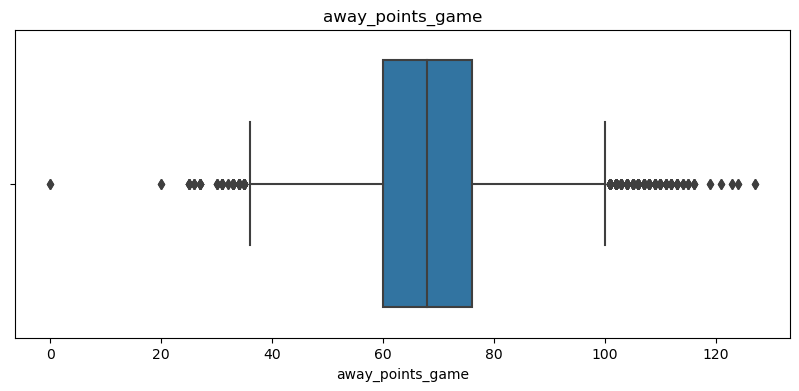

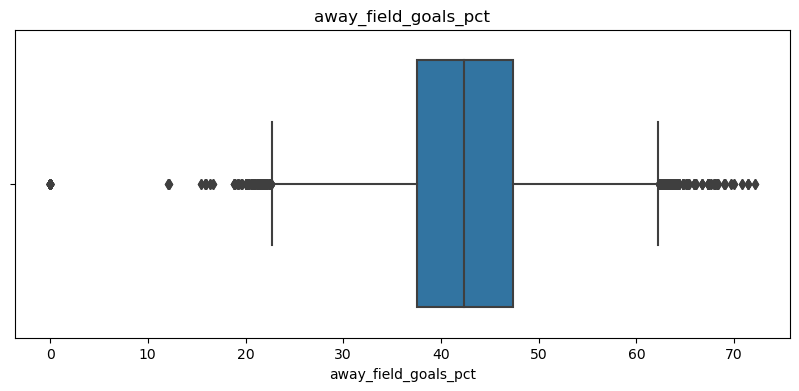

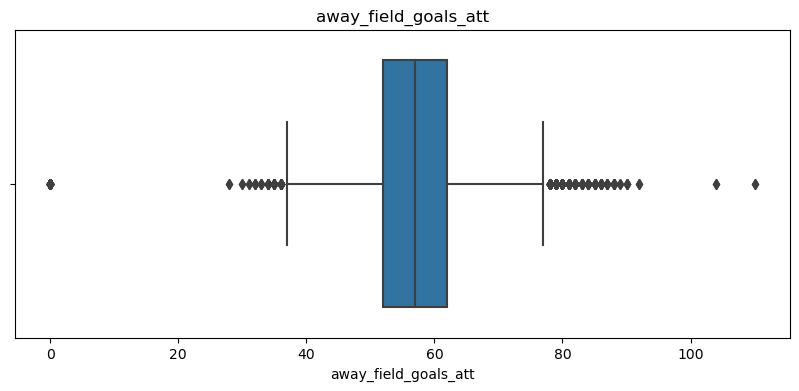

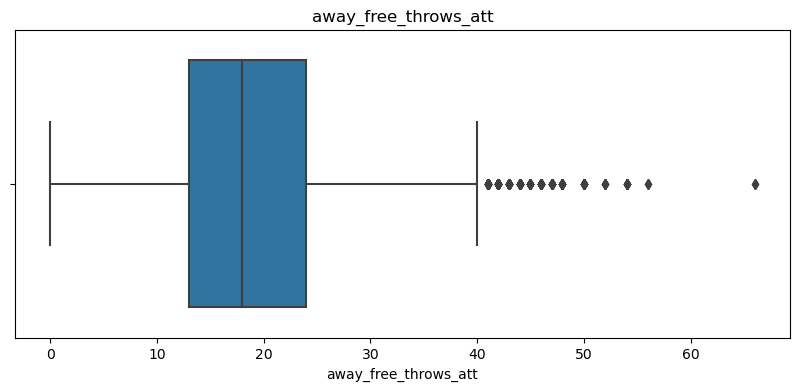

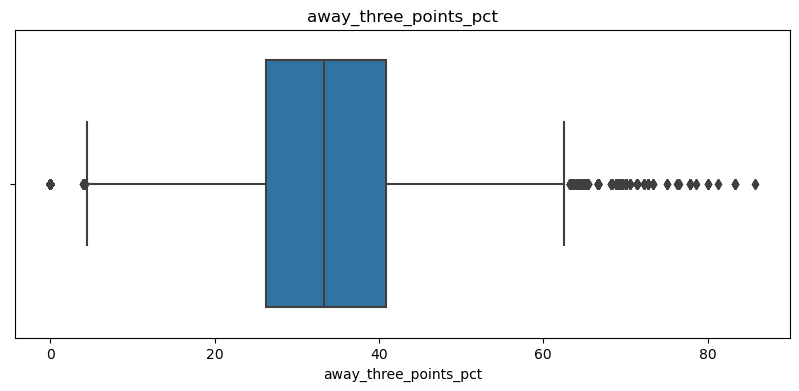

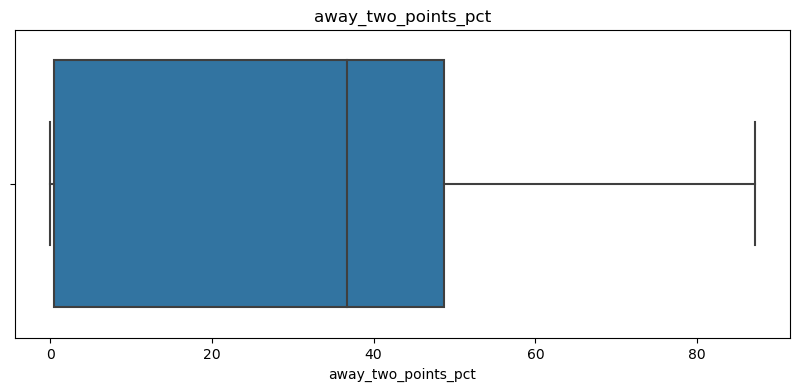

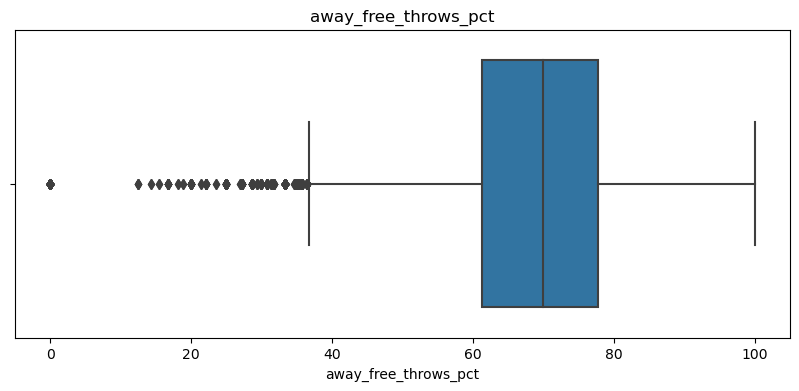

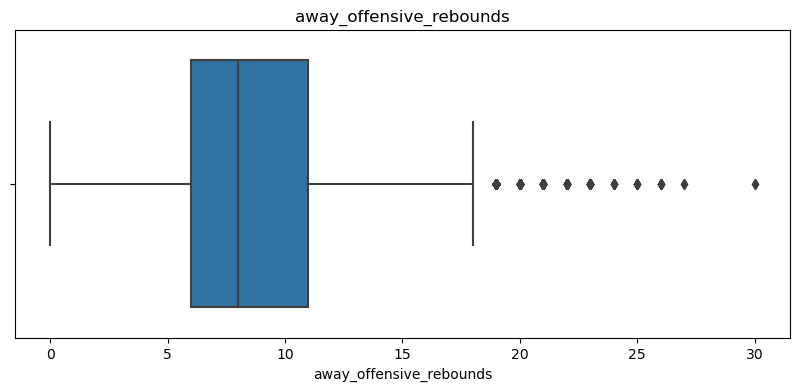

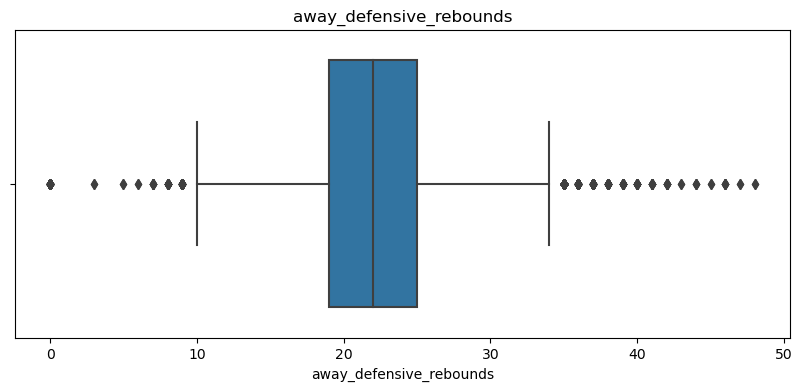

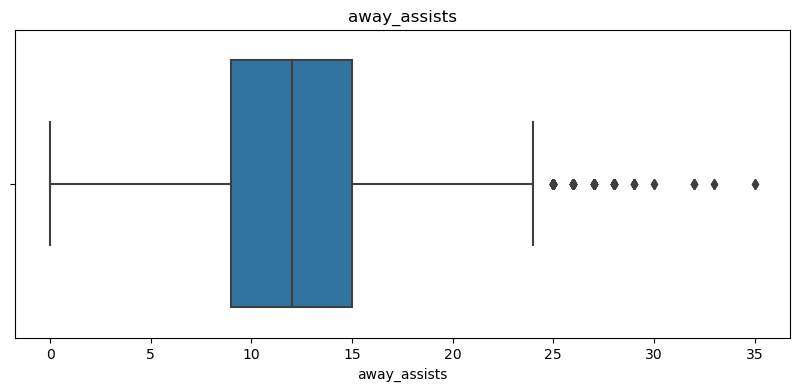

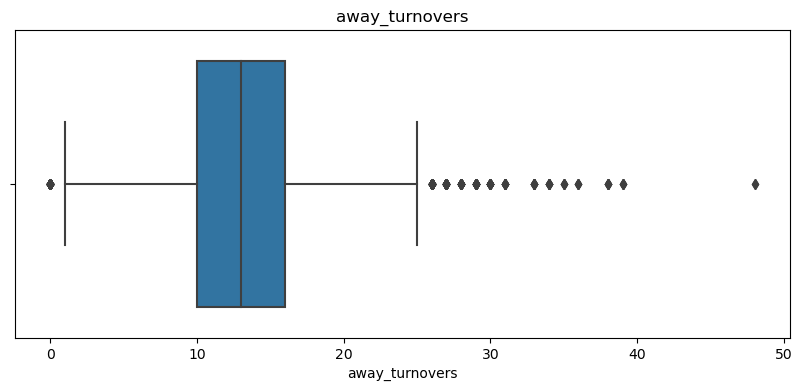

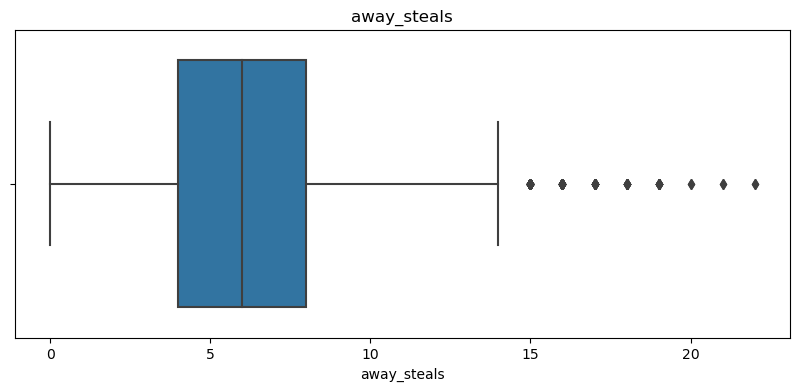

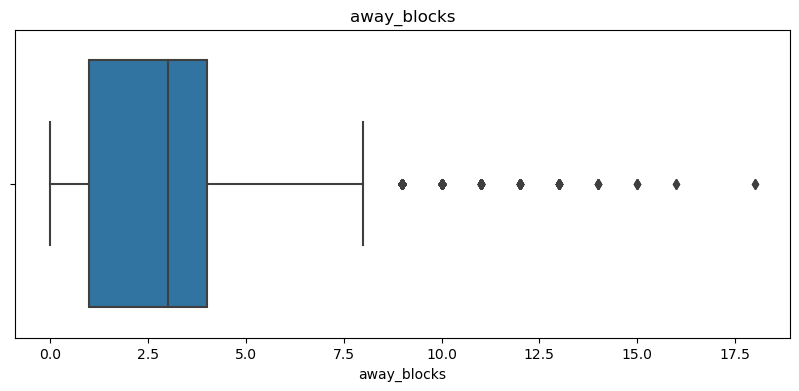

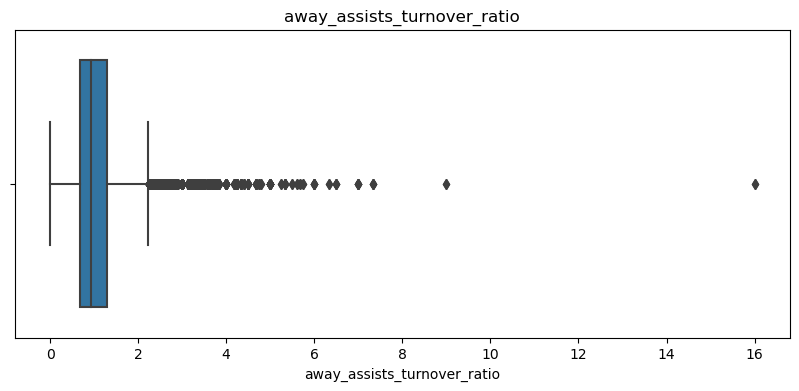

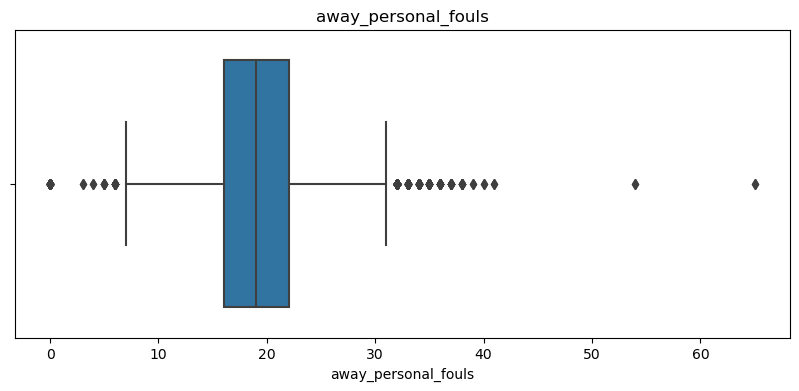

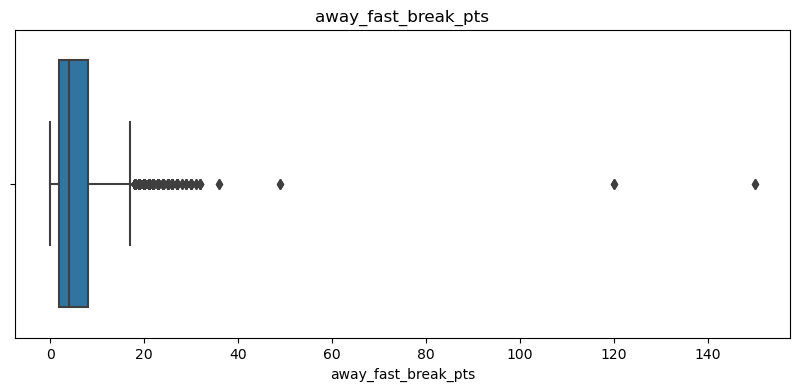

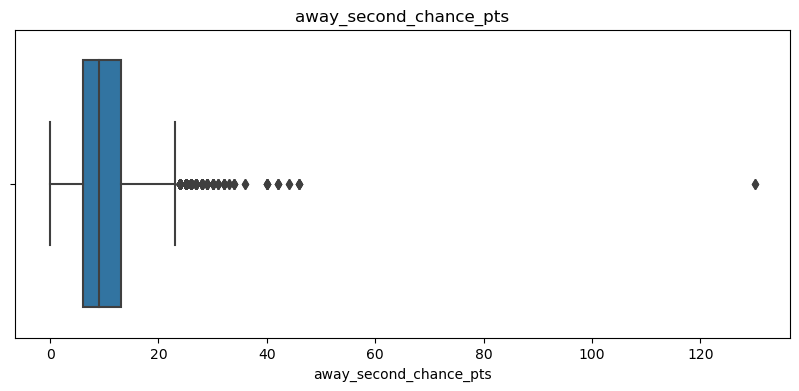

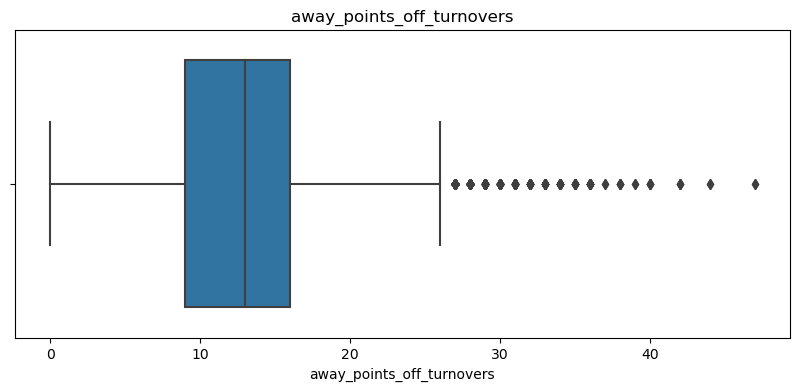

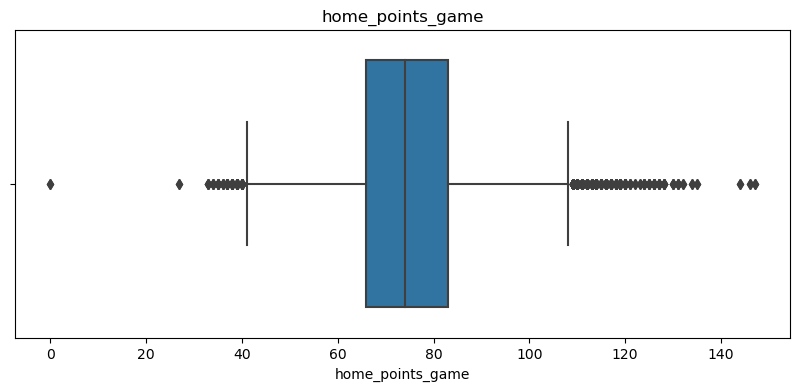

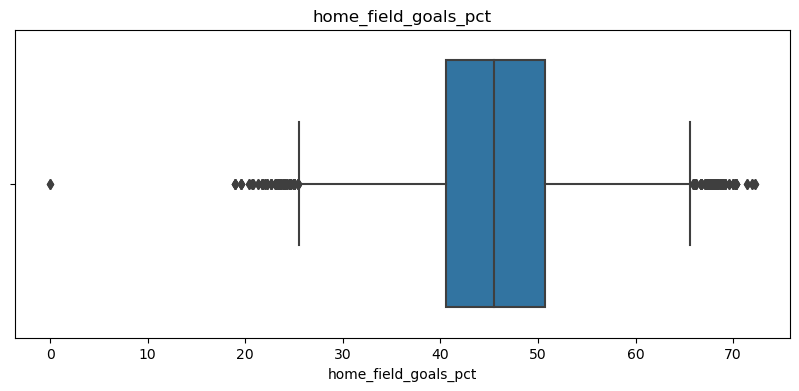

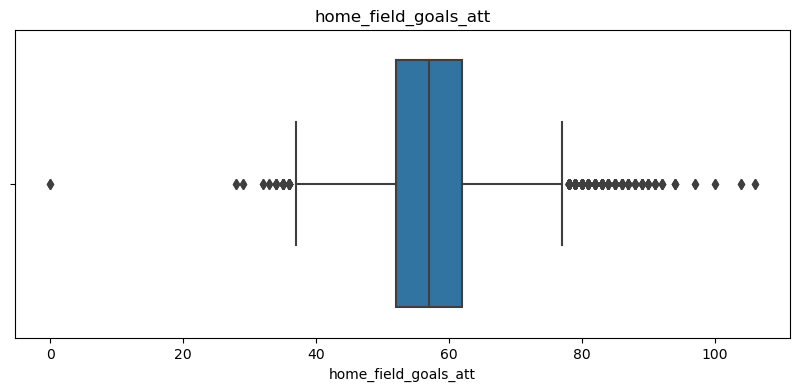

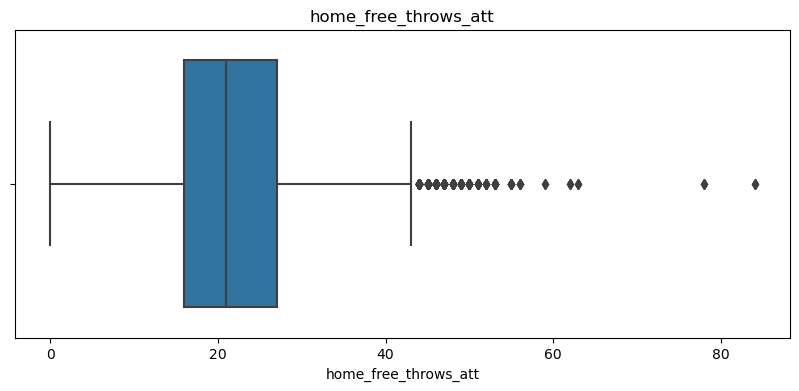

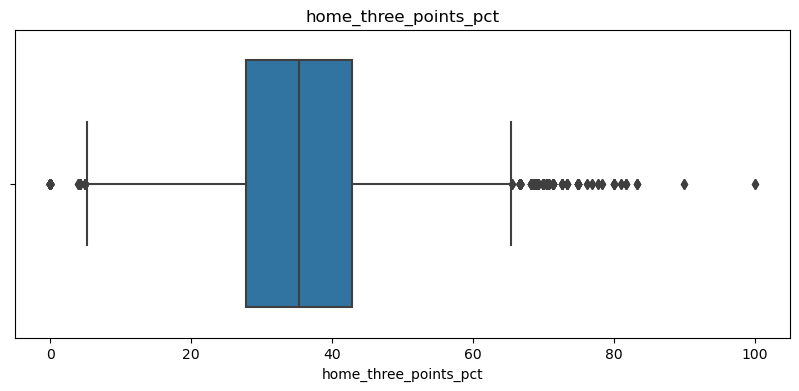

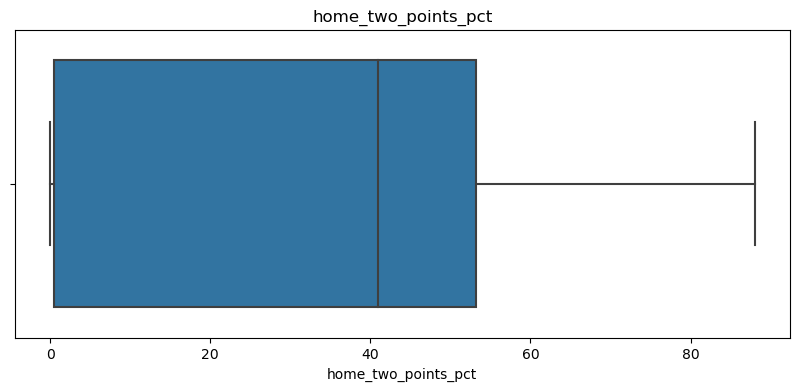

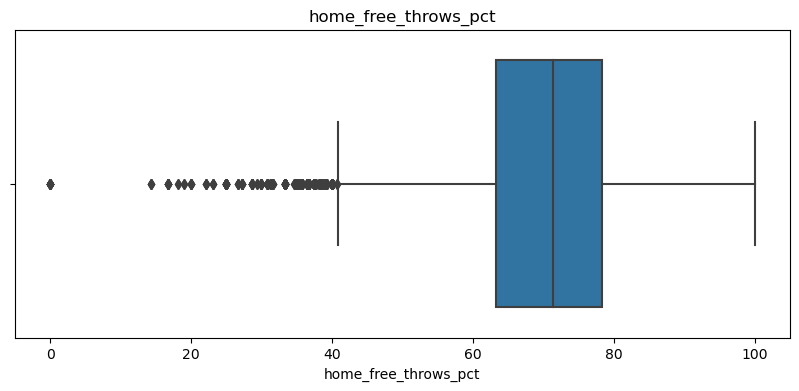

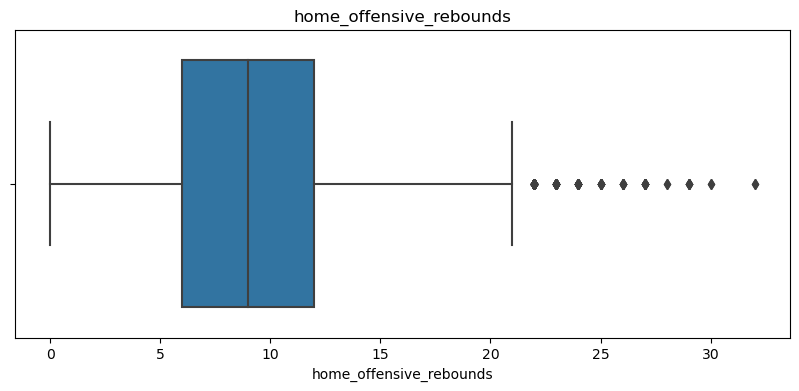

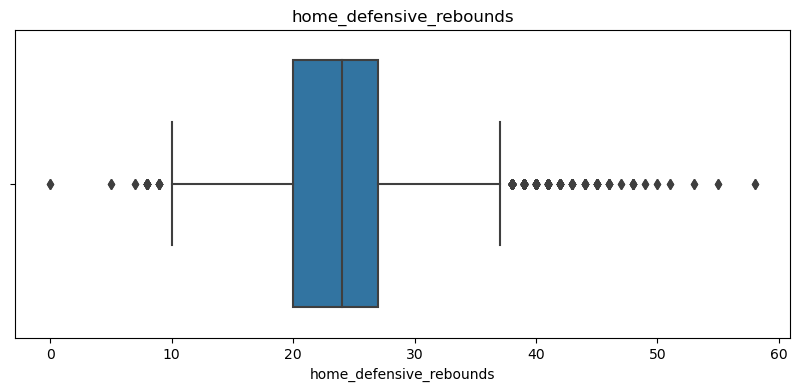

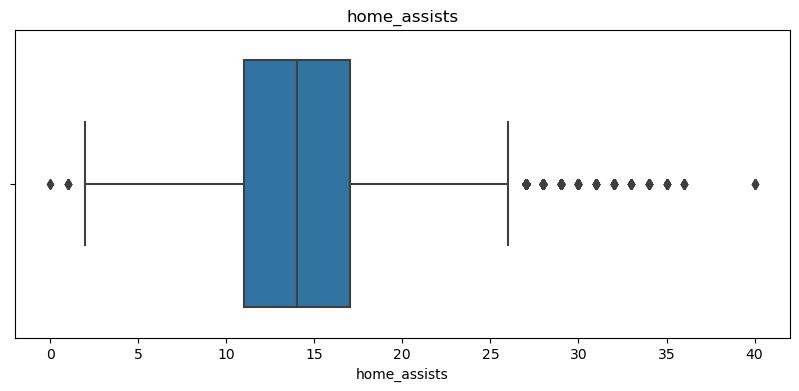

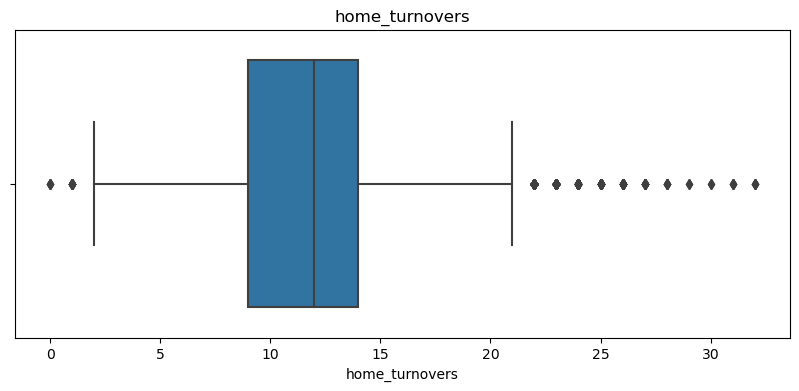

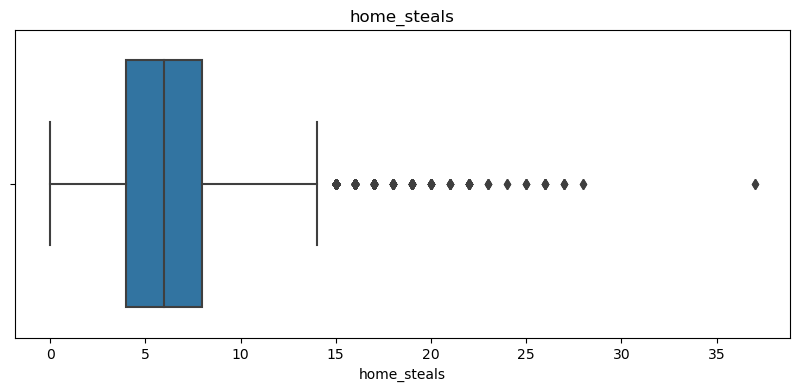

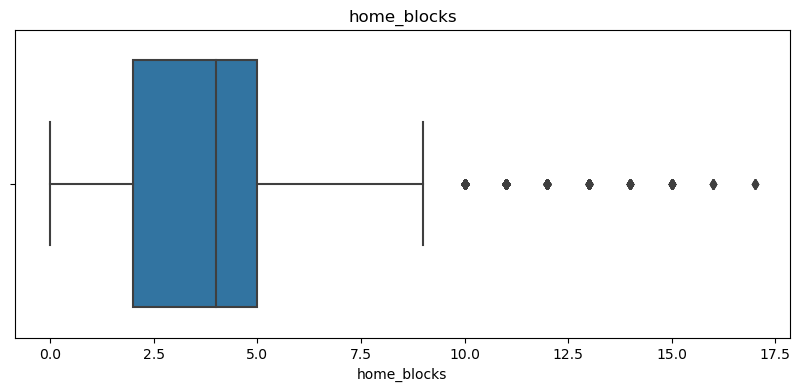

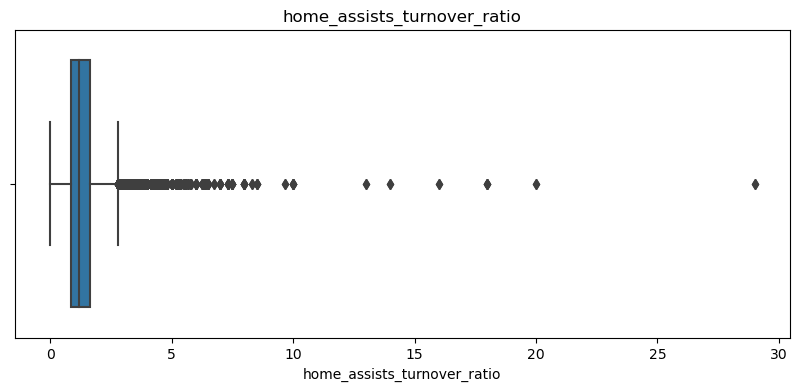

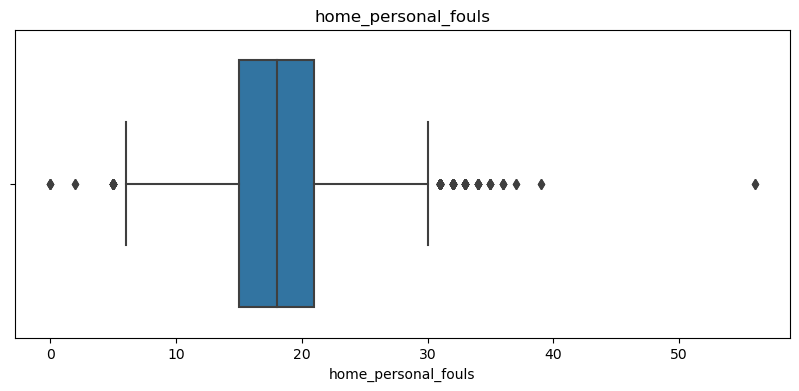

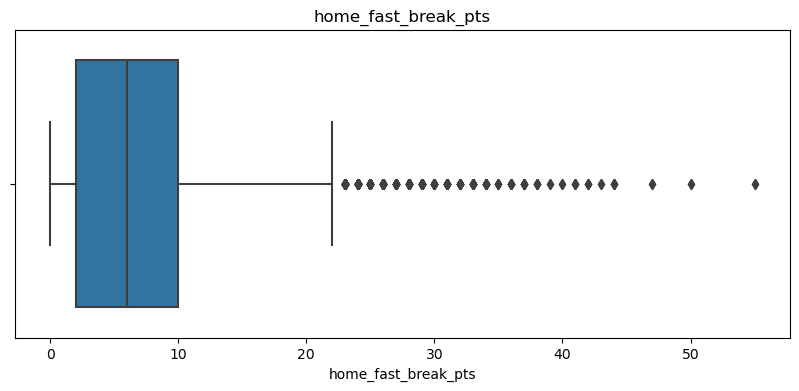

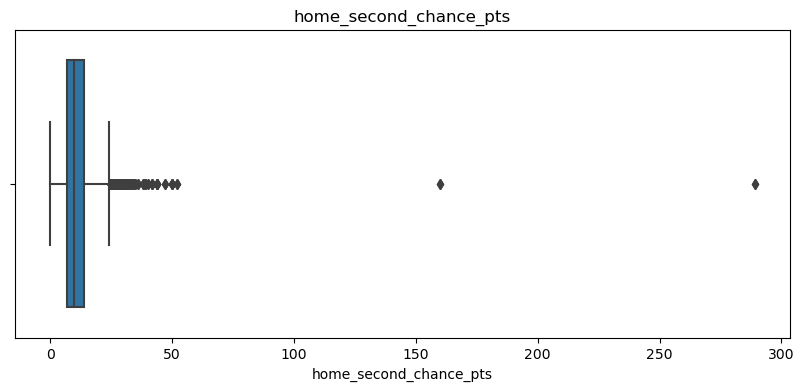

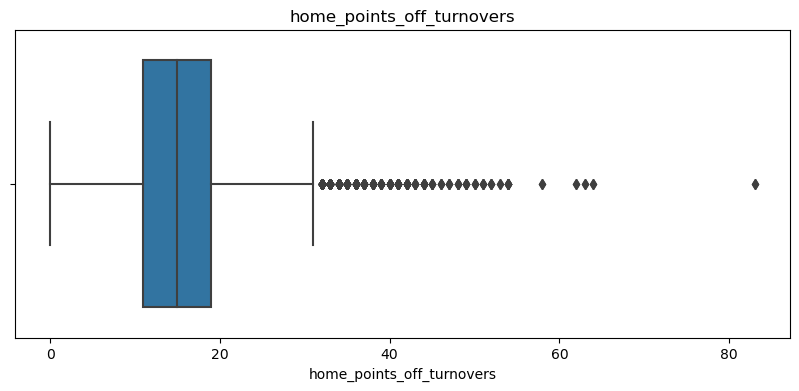

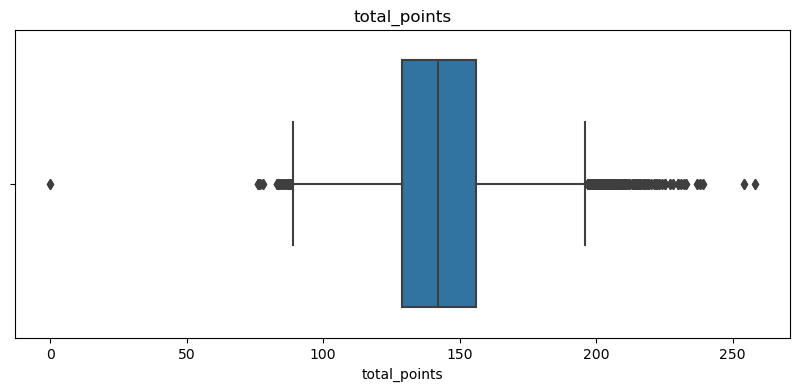

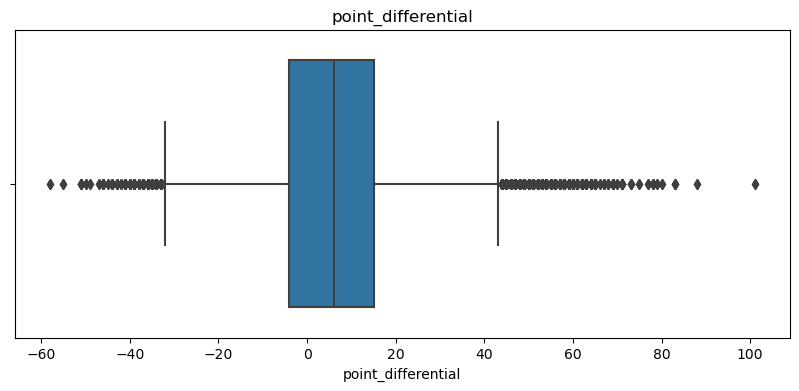

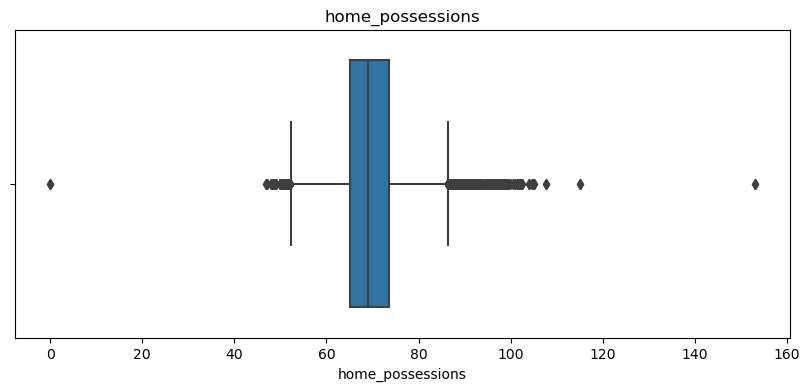

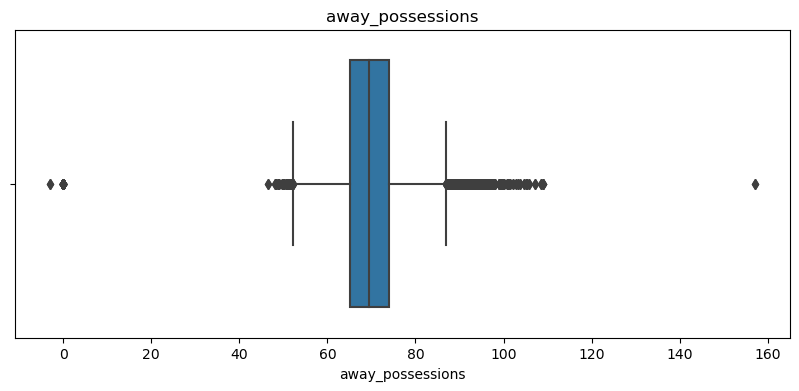

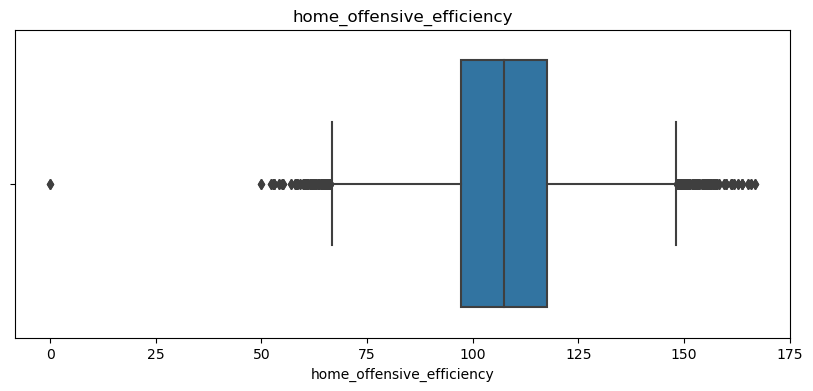

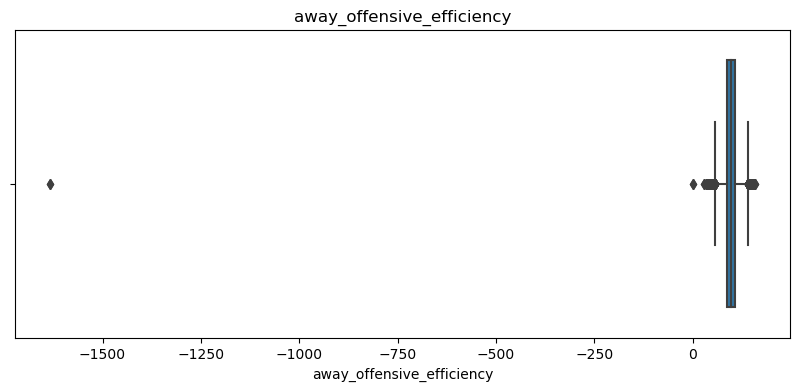

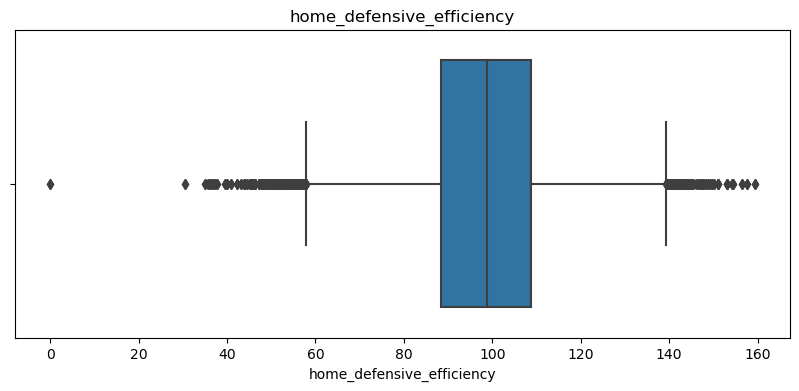

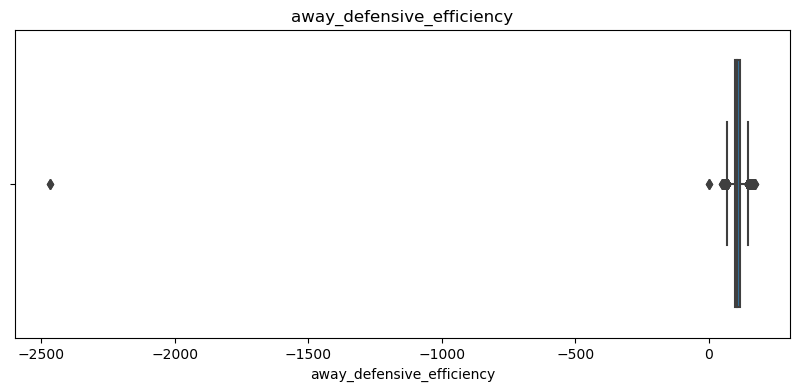

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
for column in HAdf.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=HAdf[column])
    plt.title(column)
    plt.show()


In [222]:
Q1 = HAdf.quantile(0.25)
Q3 = HAdf.quantile(0.75)
IQR = Q3 - Q1

# Assuming you want to remove outliers from all columns
# Adjust this if you want to exclude certain columns
HAdf = HAdf[~((HAdf < (Q1 - 1.5 * IQR)) |(HAdf > (Q3 + 1.5 * IQR))).any(axis=1)]


In [223]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scHAdf = pd.DataFrame(scaler.fit_transform(HAdf), columns=HAdf.columns)


In [224]:
scHAdf.columns

Index(['away_points_game', 'away_field_goals_pct', 'away_field_goals_att',
       'away_free_throws_att', 'away_three_points_pct', 'away_two_points_pct',
       'away_free_throws_pct', 'away_offensive_rebounds',
       'away_defensive_rebounds', 'away_assists', 'away_turnovers',
       'away_steals', 'away_blocks', 'away_assists_turnover_ratio',
       'away_personal_fouls', 'away_fast_break_pts', 'away_second_chance_pts',
       'away_points_off_turnovers', 'home_points_game', 'home_field_goals_pct',
       'home_field_goals_att', 'home_free_throws_att', 'home_three_points_pct',
       'home_two_points_pct', 'home_free_throws_pct',
       'home_offensive_rebounds', 'home_defensive_rebounds', 'home_assists',
       'home_turnovers', 'home_steals', 'home_blocks',
       'home_assists_turnover_ratio', 'home_personal_fouls',
       'home_fast_break_pts', 'home_second_chance_pts',
       'home_points_off_turnovers', 'total_points', 'point_differential',
       'home_possessions', 'away_pos

In [225]:
from sklearn.model_selection import train_test_split

X = scHAdf.drop(['point_differential','total_points','away_points_game','home_points_game'], axis=1)  # Replace 'target_column' with your target variable
y = scHAdf['point_differential']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and Evaluating
scaled_predictions = model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, scaled_predictions)}')


Mean Squared Error: 0.005593005522411643


In [226]:
from sklearn.model_selection import train_test_split

X = HAdf.drop(['point_differential','total_points','away_points_game','home_points_game'], axis=1)  # Replace 'target_column' with your target variable
y = HAdf['point_differential']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and Evaluating
unscaled_predictions = model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, unscaled_predictions)}')


Mean Squared Error: 0.8760456027274258


In [227]:
# Calculate the RMSE for both scaled and unscaled MSE
unscaled_rmse = np.sqrt(12.806404201687476)  # Unscaled data
scaled_rmse = np.sqrt(0.08074947434228548)   # Scaled data

# Print out the RMSE values
print(f'Unscaled RMSE: {unscaled_rmse}')
print(f'Scaled RMSE: {scaled_rmse}')

# Compare RMSE to the standard deviation of the original data
original_std = HAdf['point_differential'].std()  # Standard deviation of the original unscaled data

# See how many times the standard deviation is the unscaled RMSE
times_std_unscaled = unscaled_rmse / original_std

print(f"The unscaled RMSE is {times_std_unscaled:.2f} times the standard deviation of the original data.")


scaled_std = scHAdf['point_differential'].std()  # Standard deviation of the original unscaled data

# See how many times the standard deviation is the unscaled RMSE
times_std_scaled = scaled_rmse / scaled_std

print(f"The scaled RMSE is {times_std_scaled:.2f} times the standard deviation of the original data.")


Unscaled RMSE: 3.578603666472089
Scaled RMSE: 0.28416451985123947
The unscaled RMSE is 0.29 times the standard deviation of the original data.
The scaled RMSE is 0.28 times the standard deviation of the original data.


### Feature engineering on scaled data

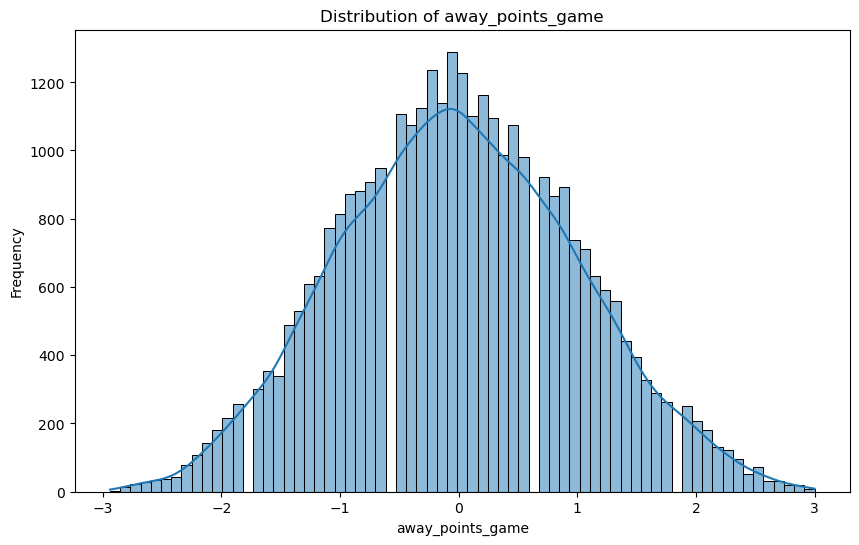

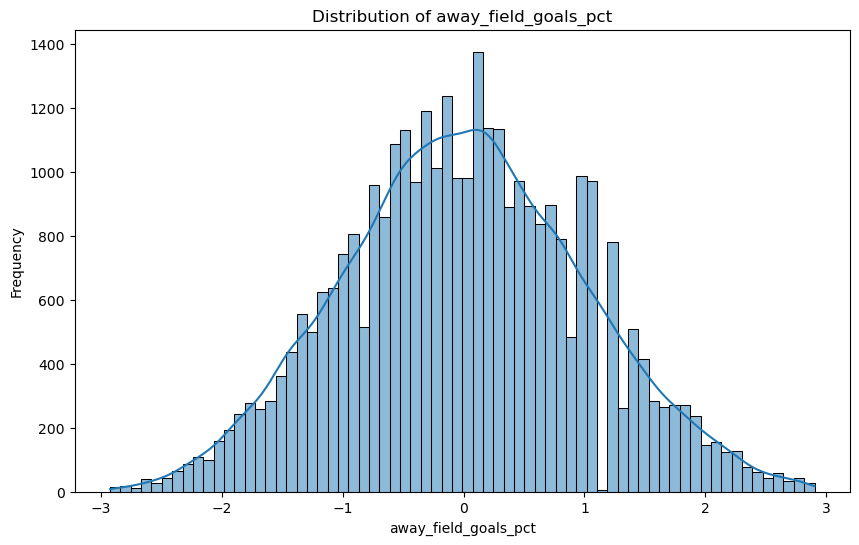

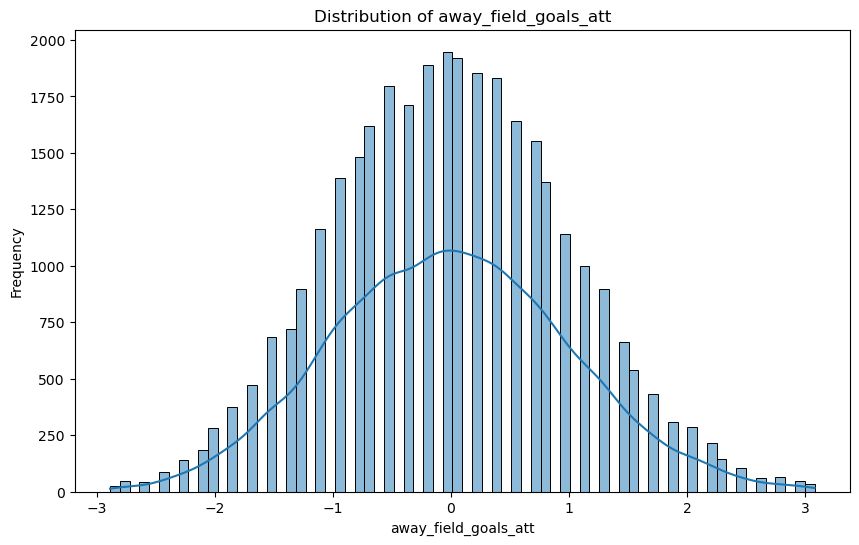

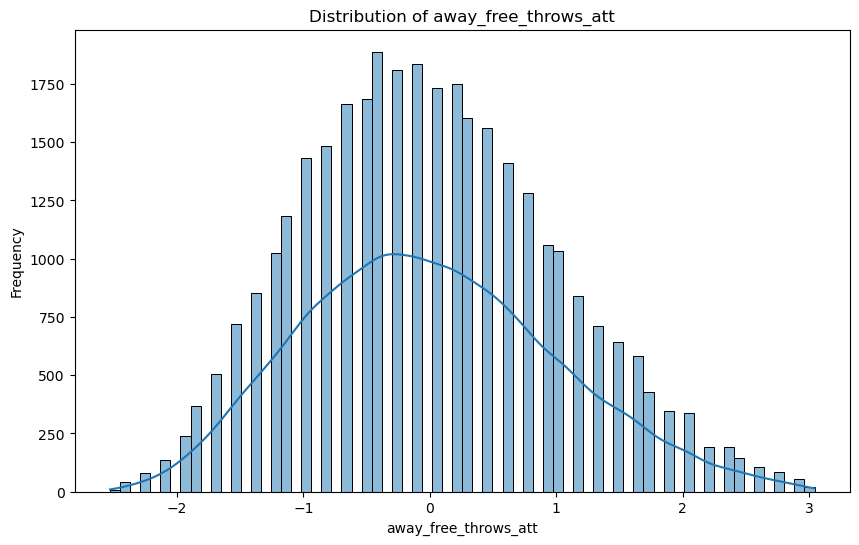

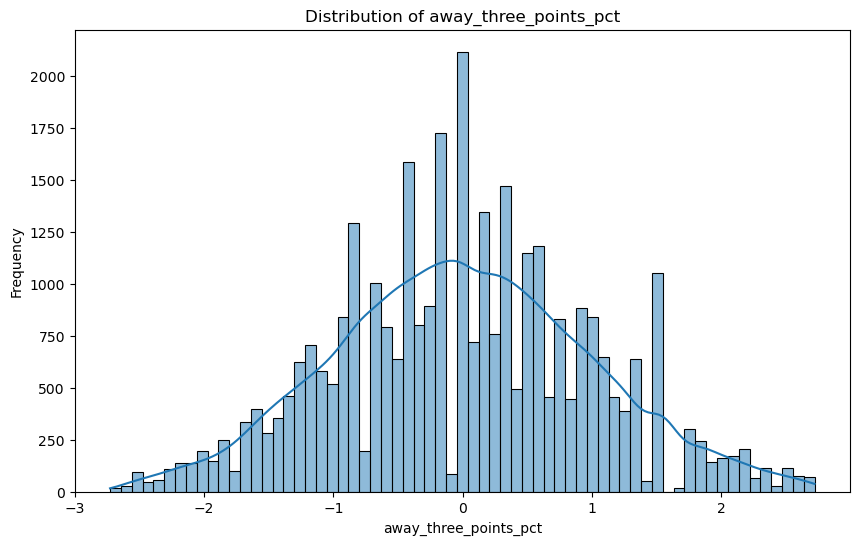

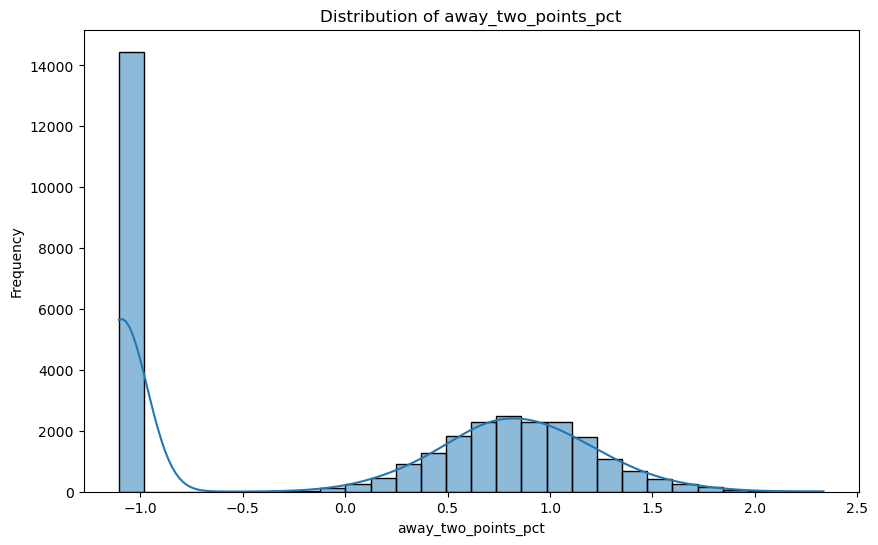

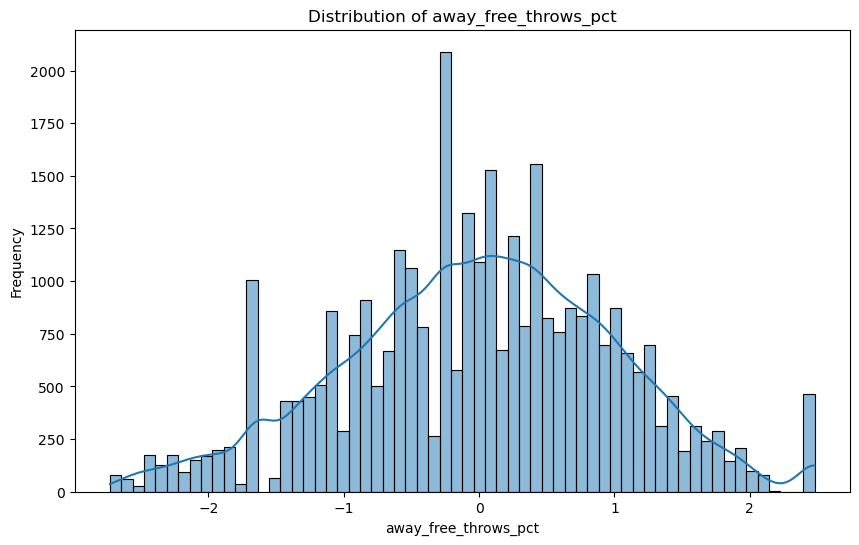

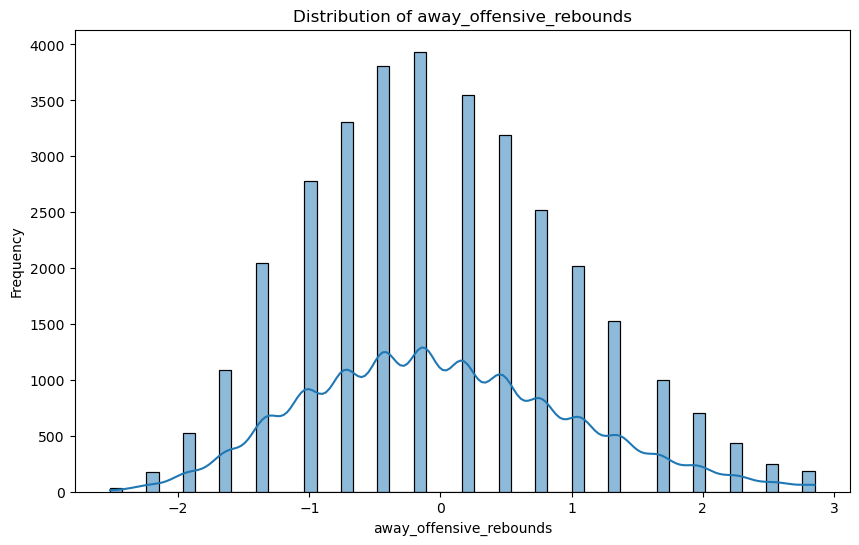

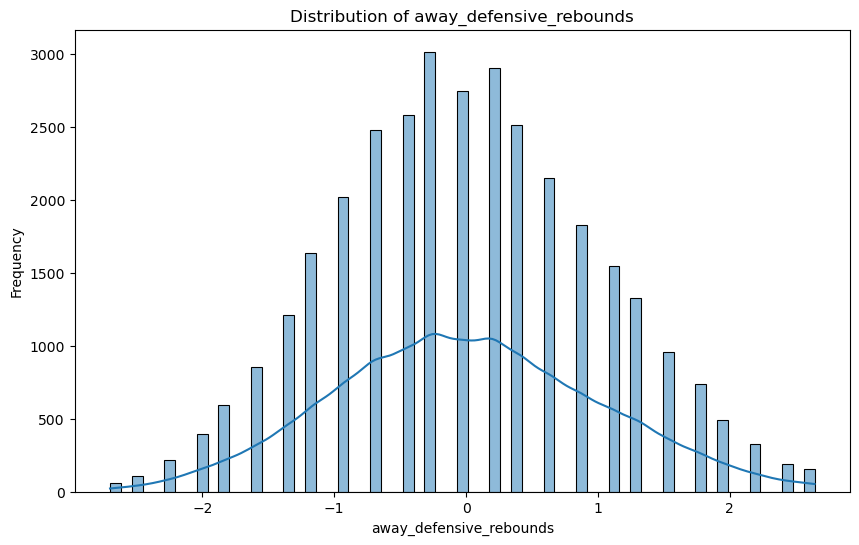

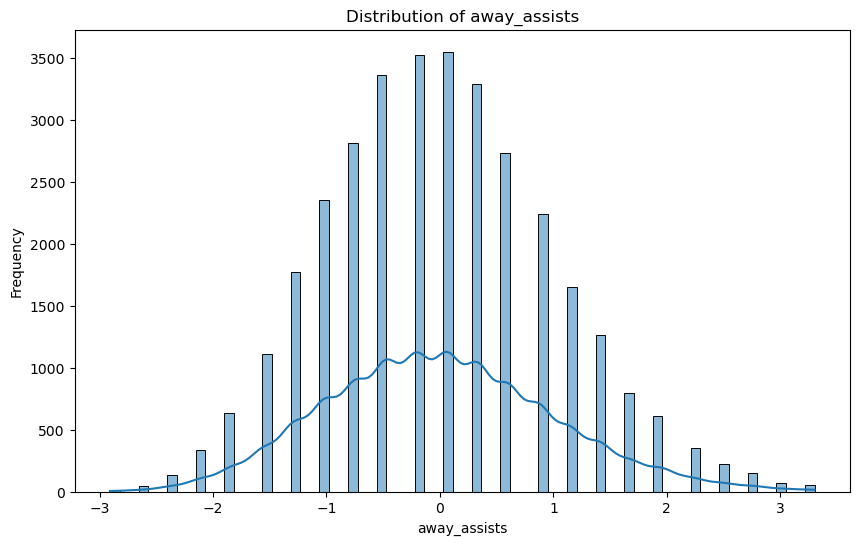

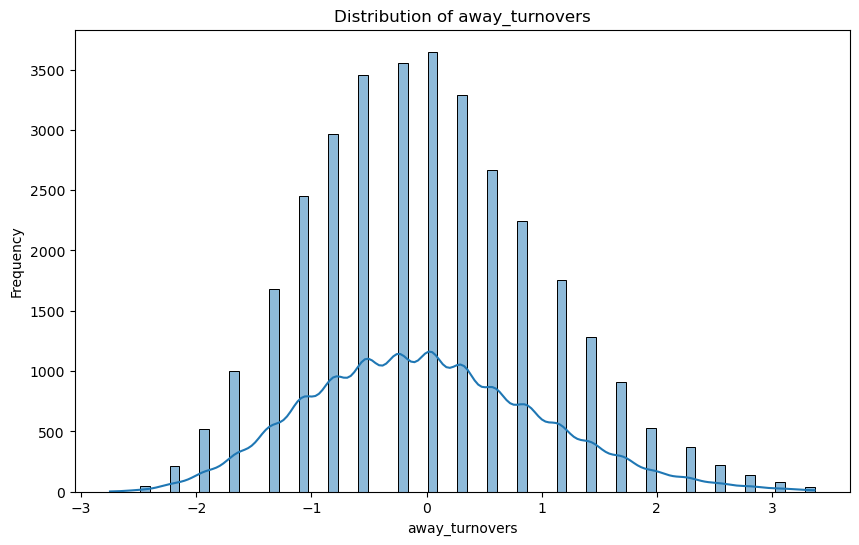

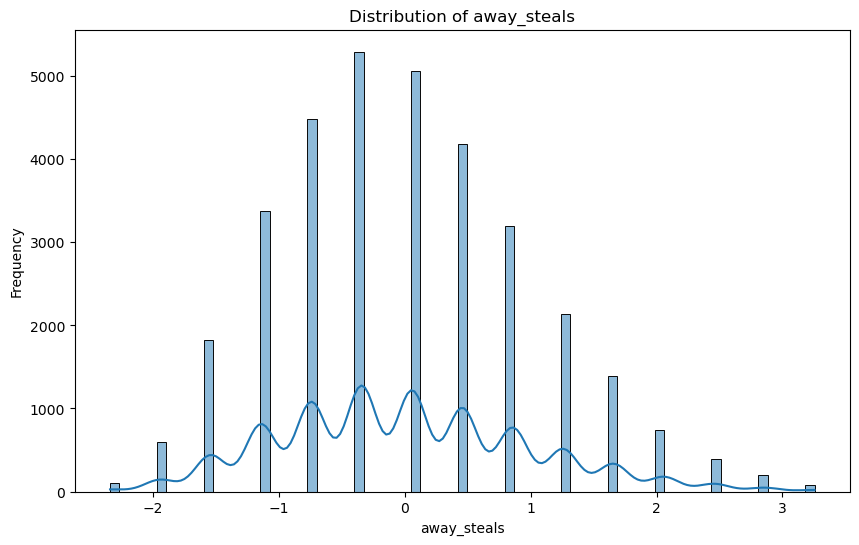

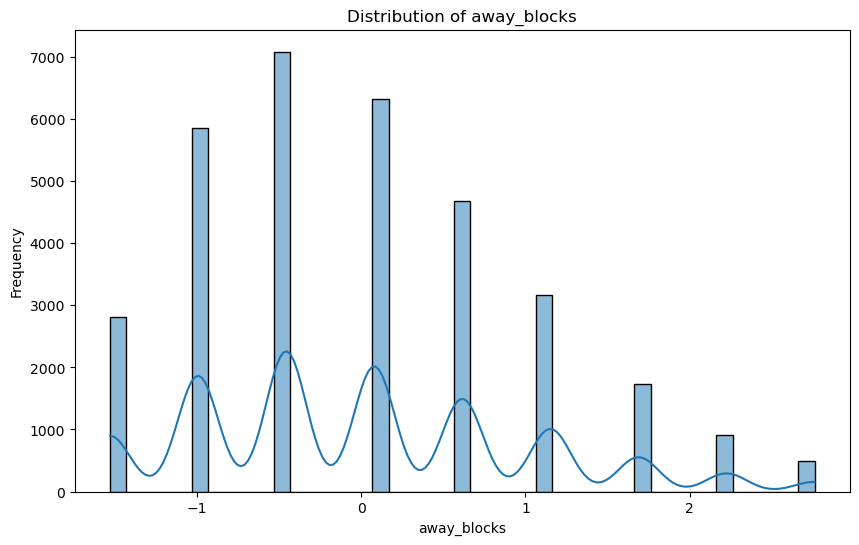

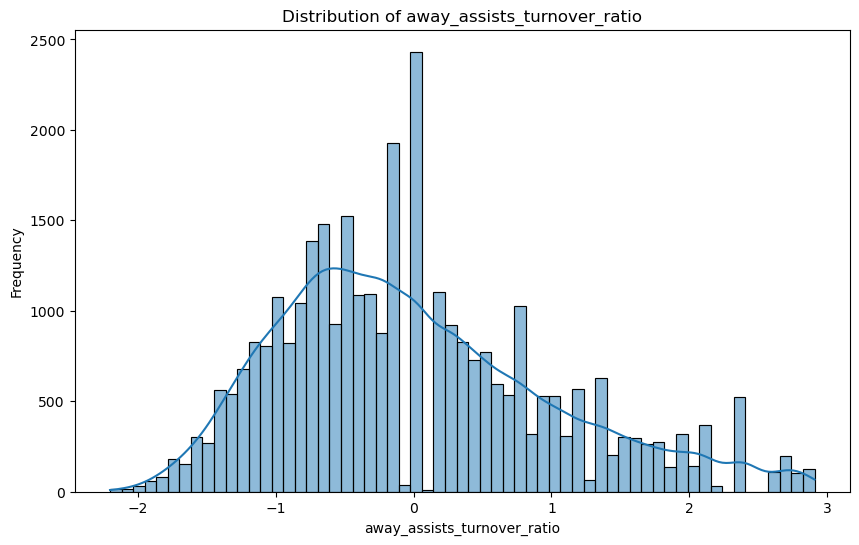

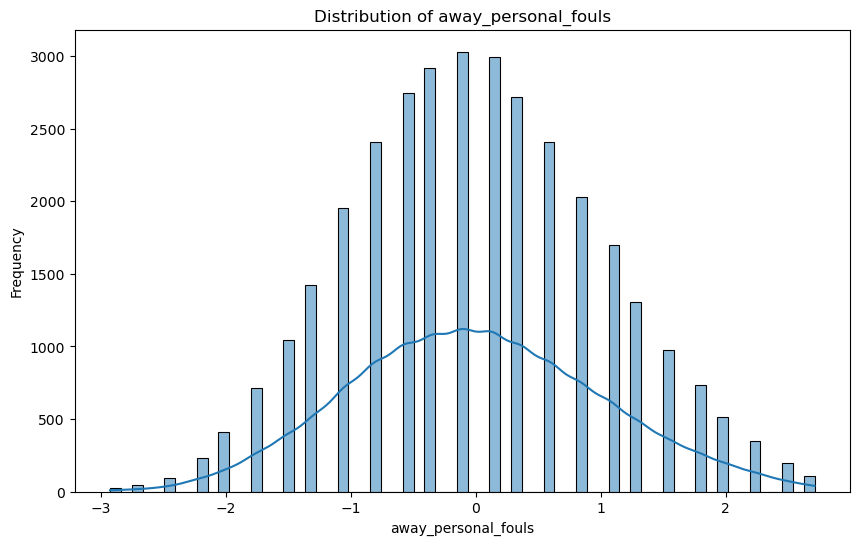

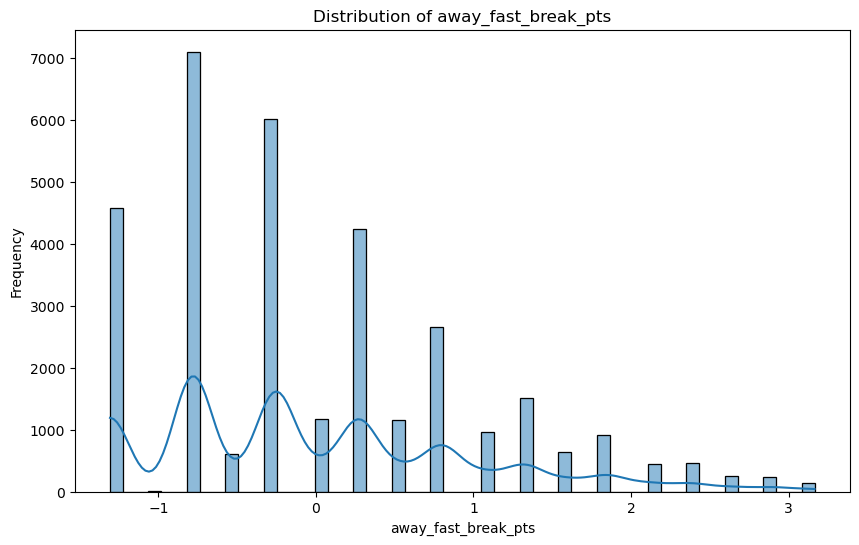

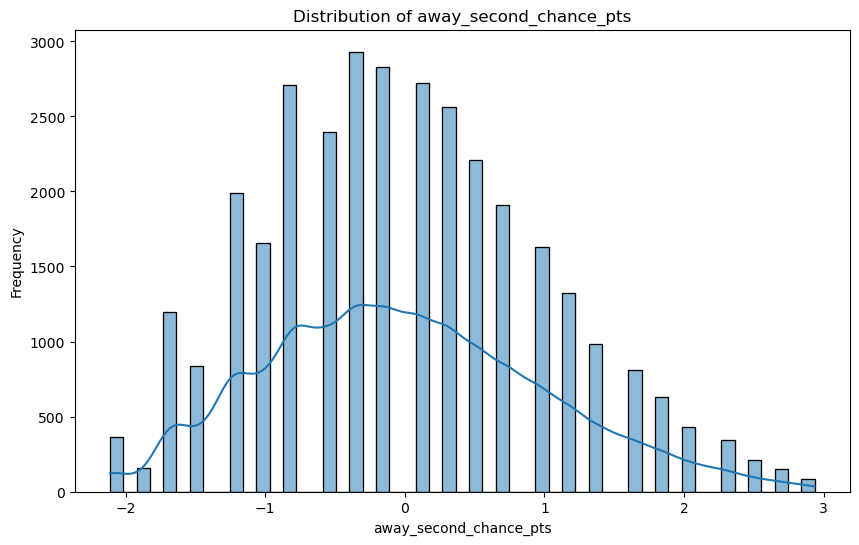

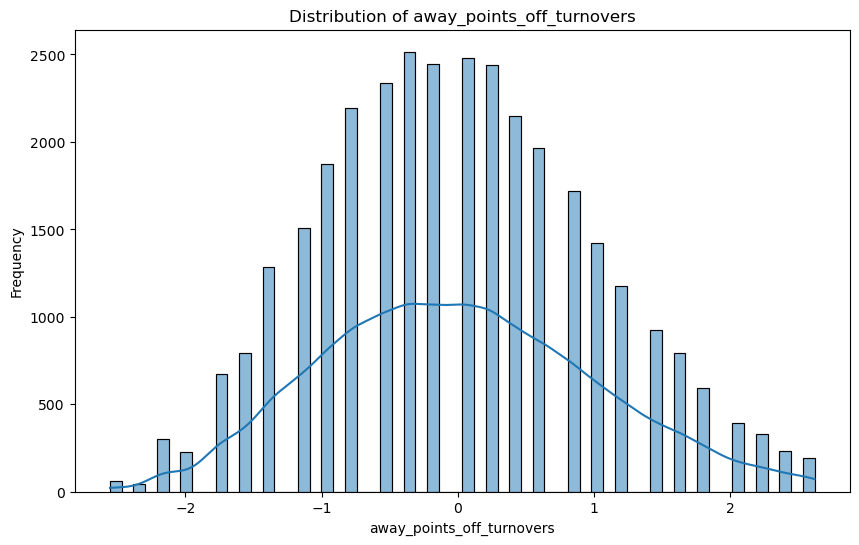

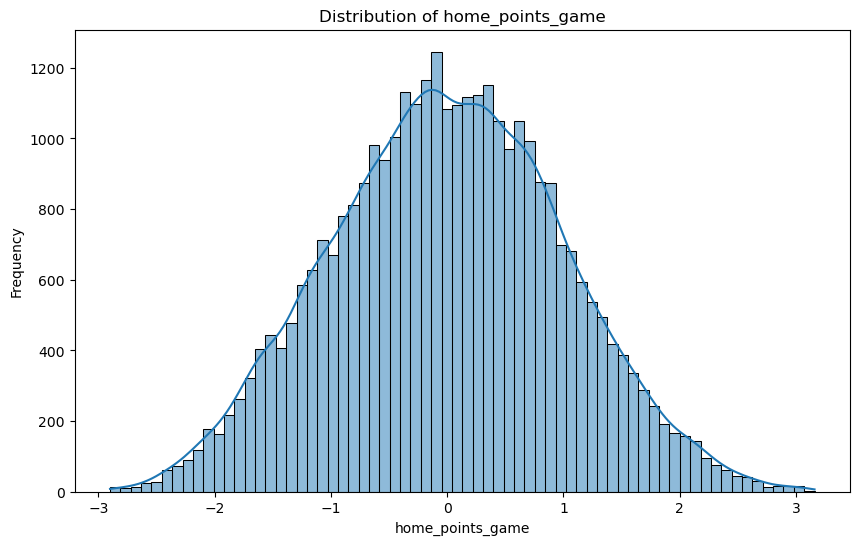

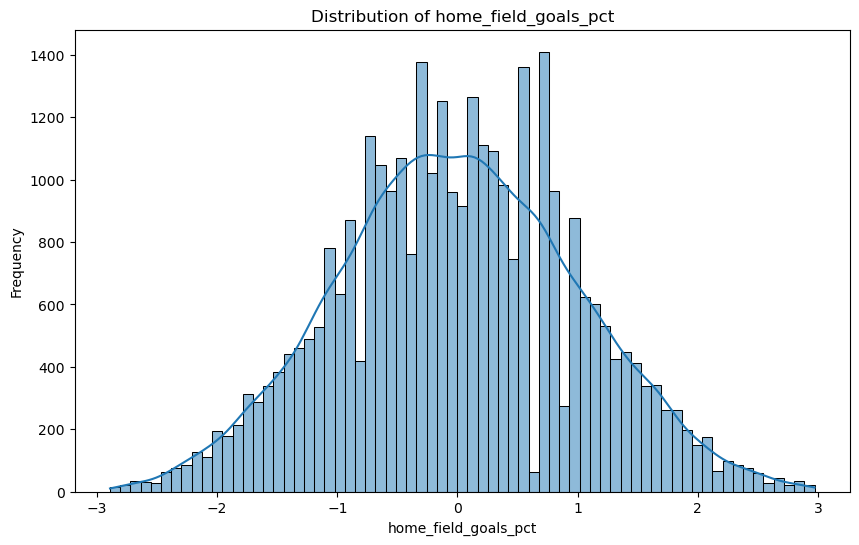

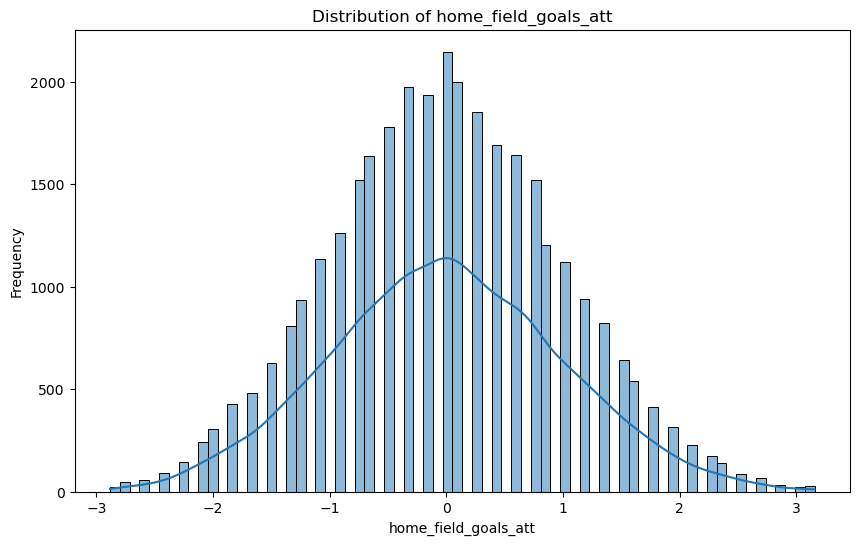

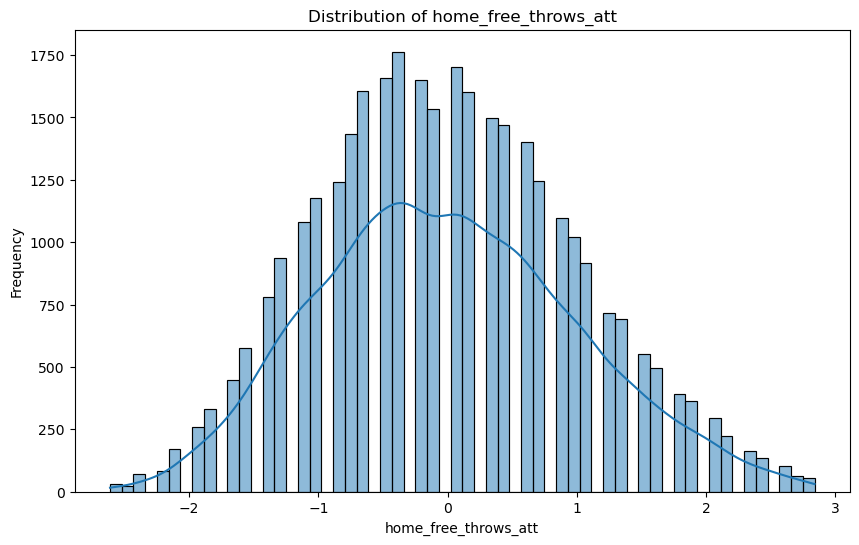

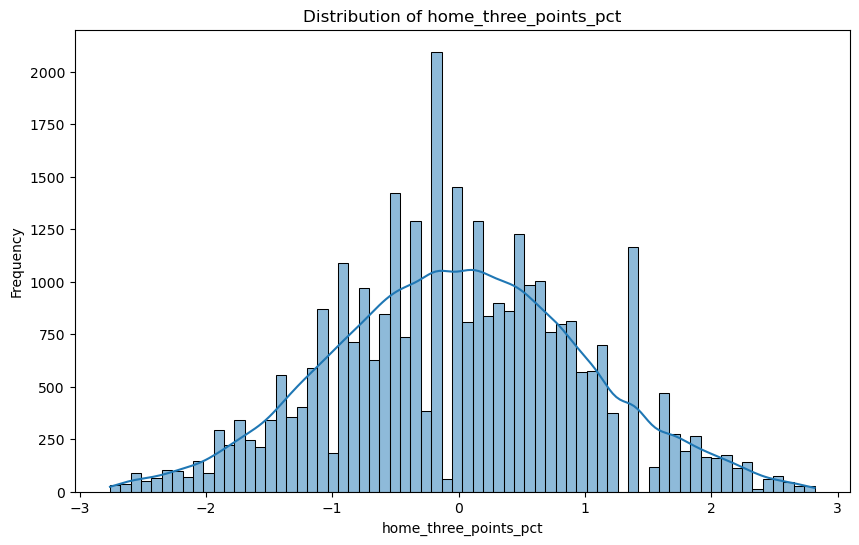

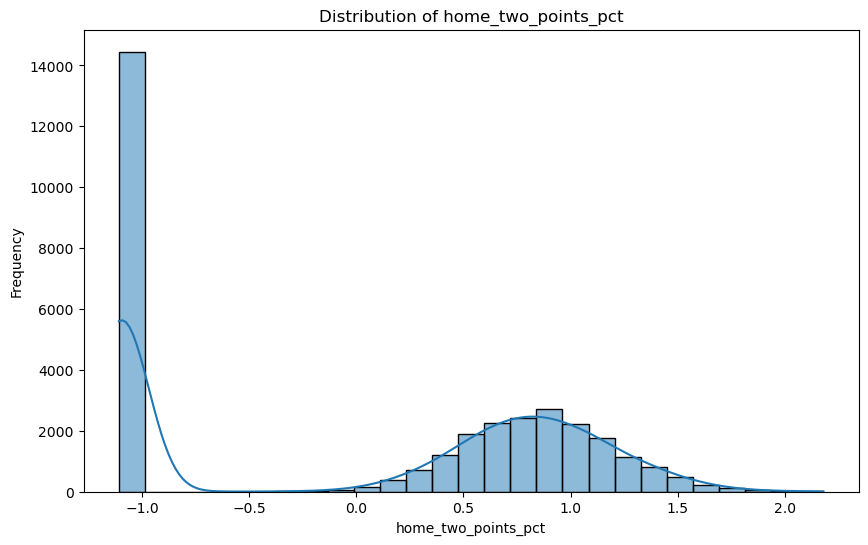

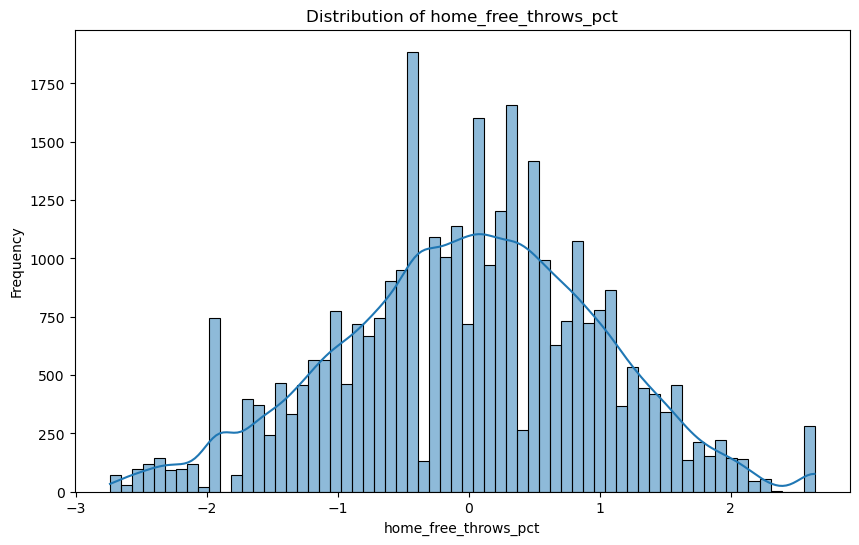

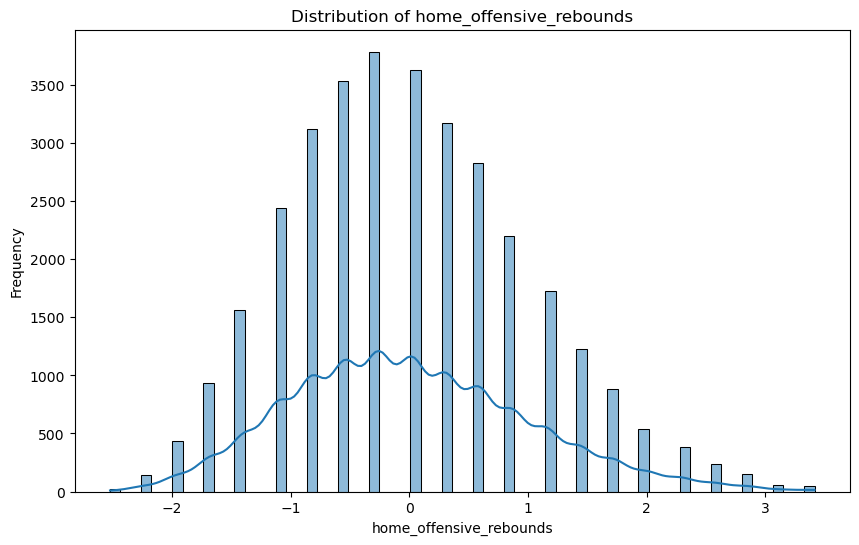

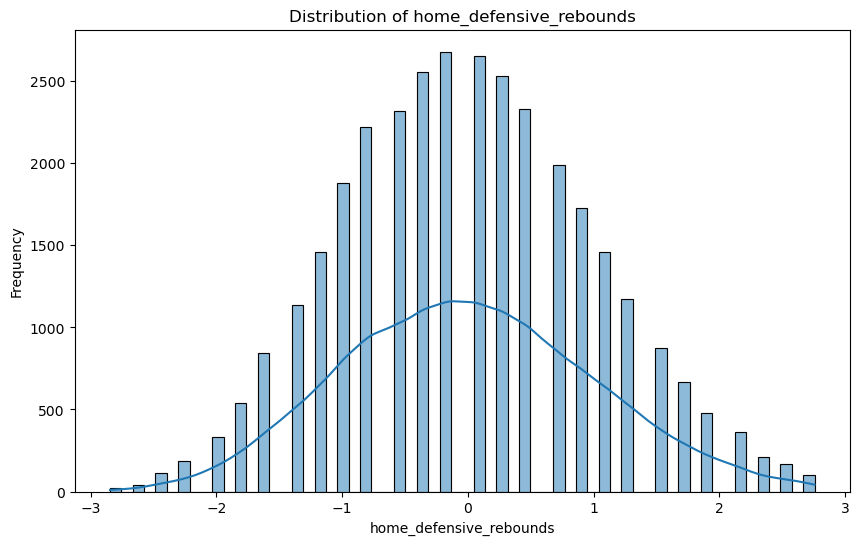

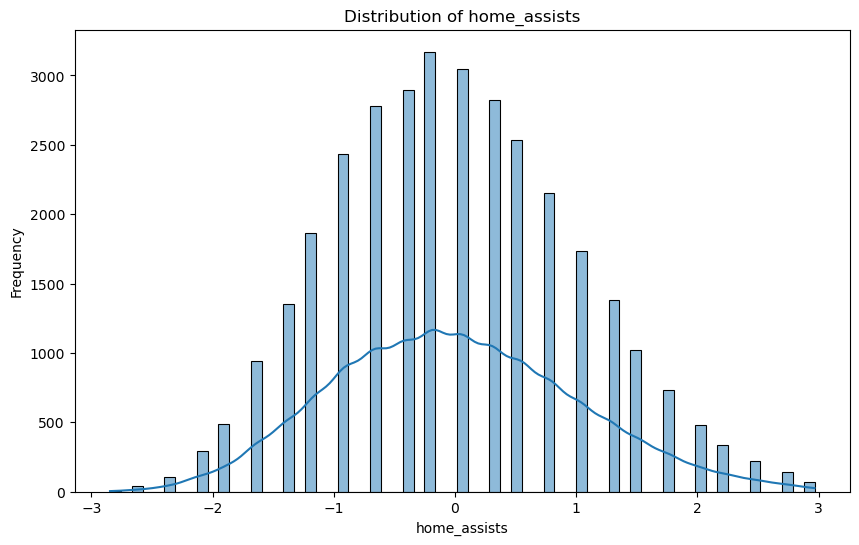

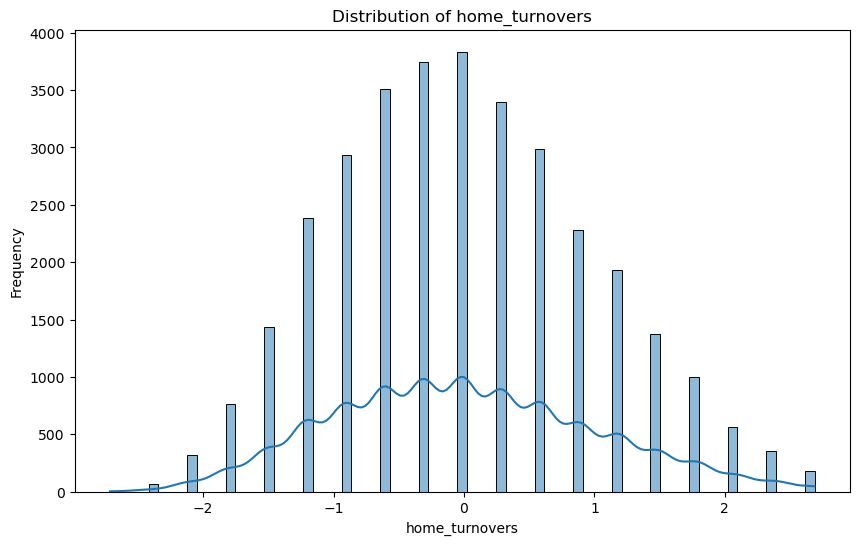

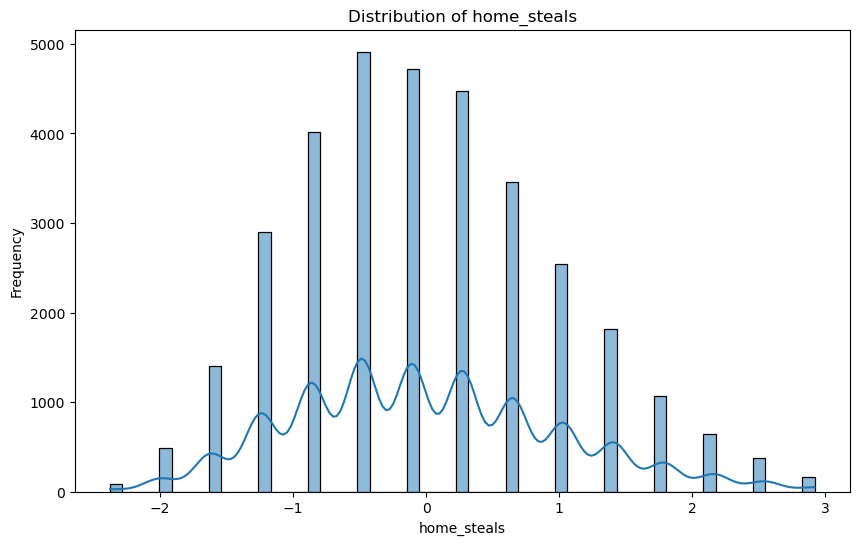

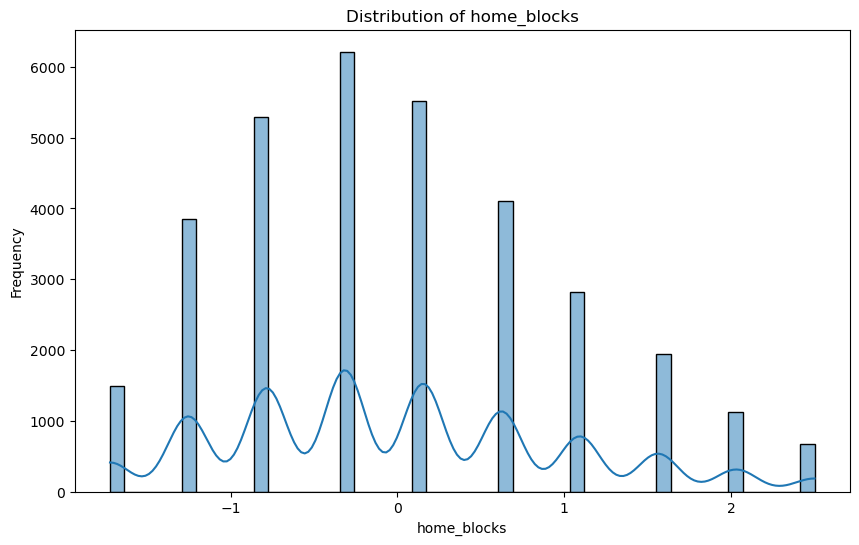

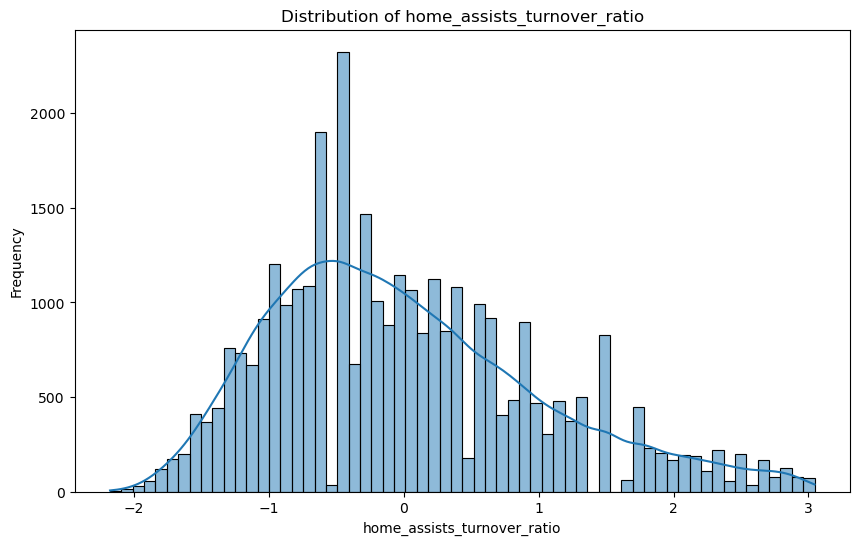

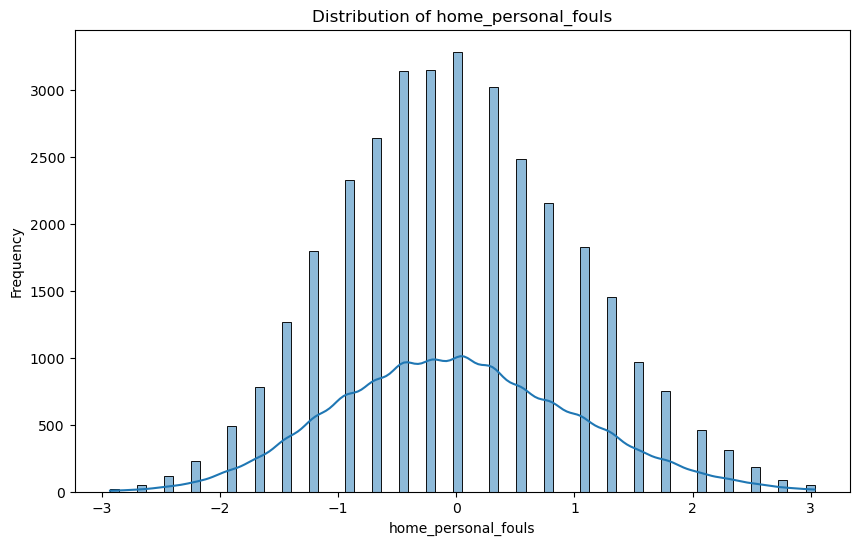

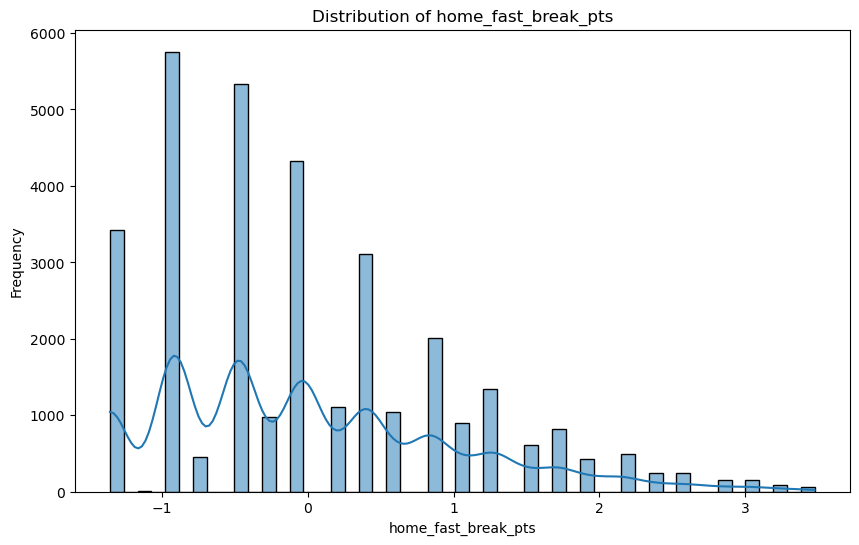

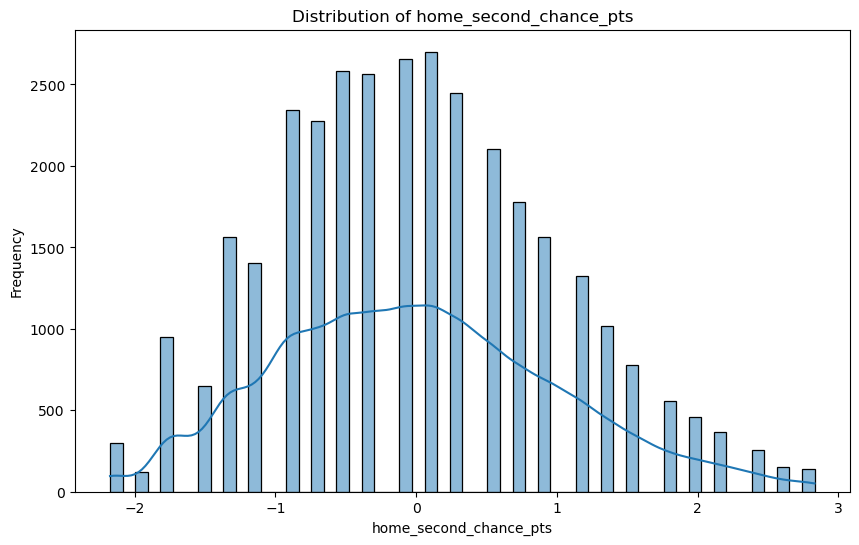

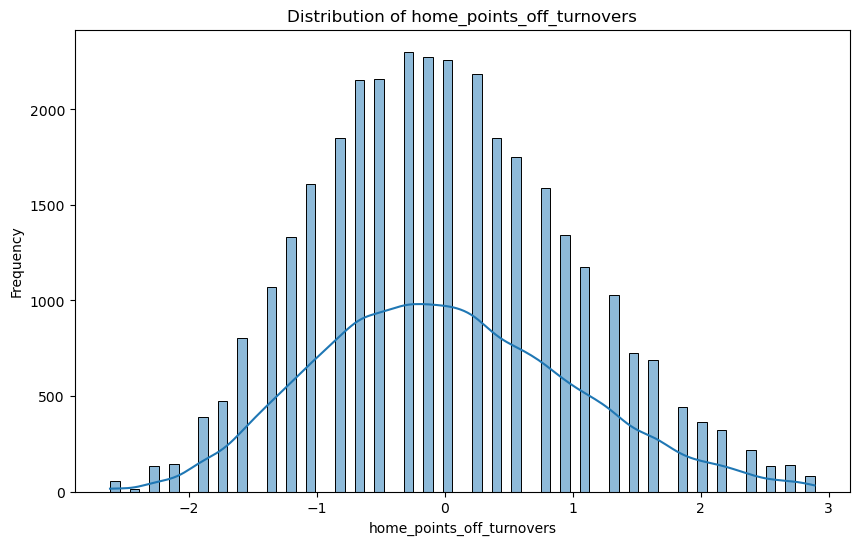

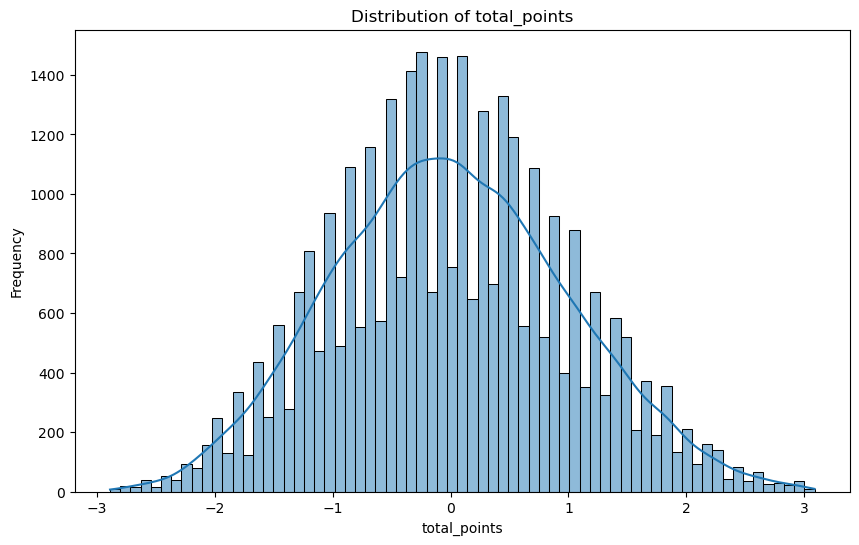

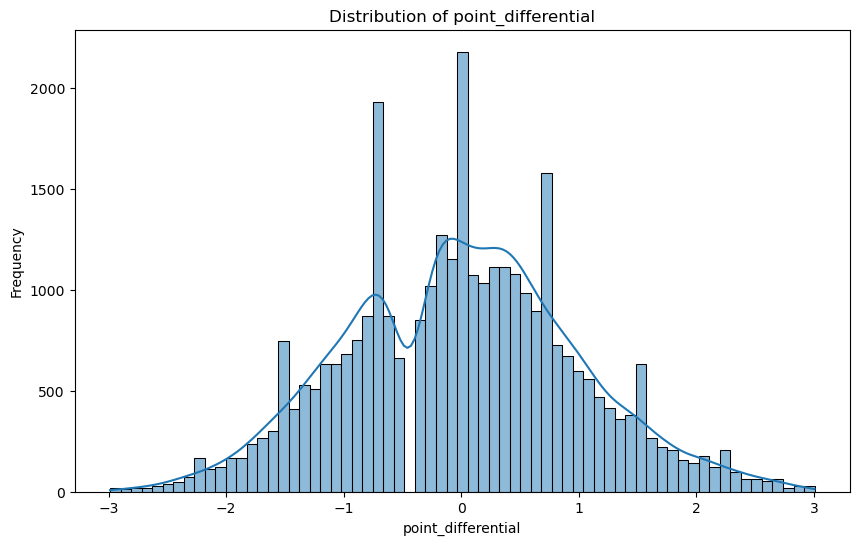

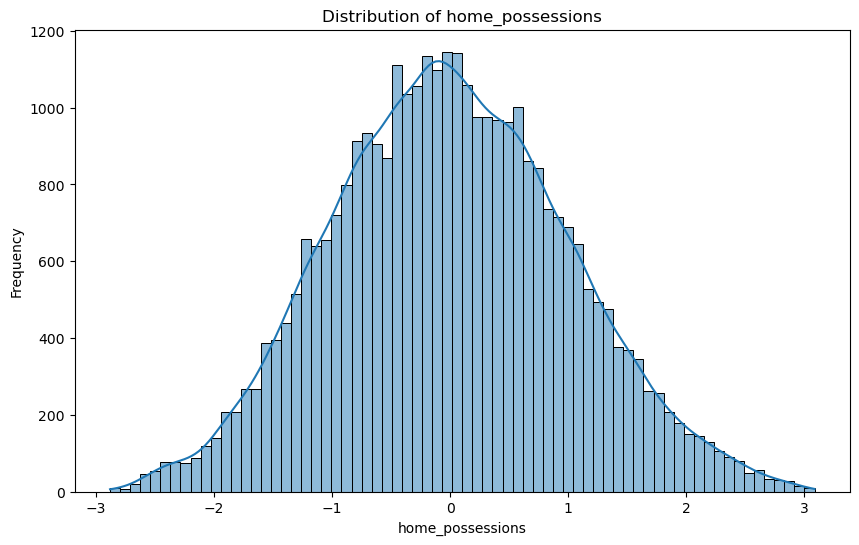

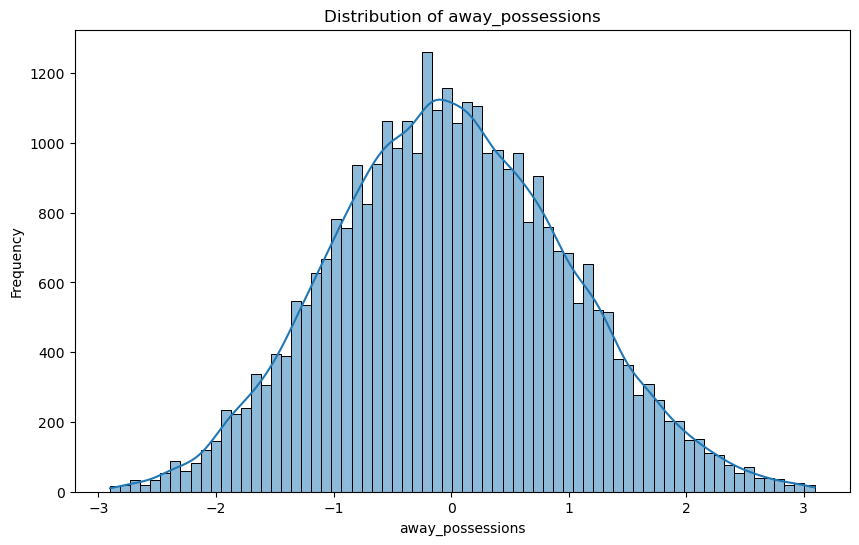

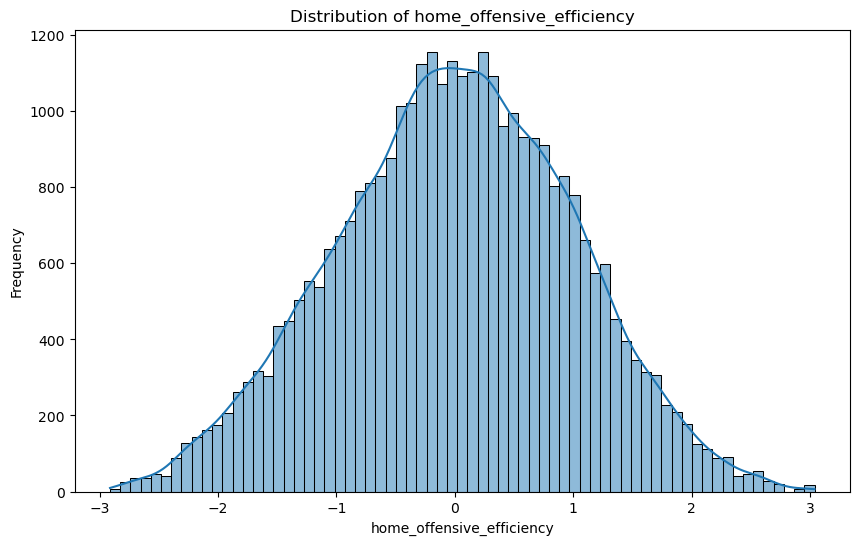

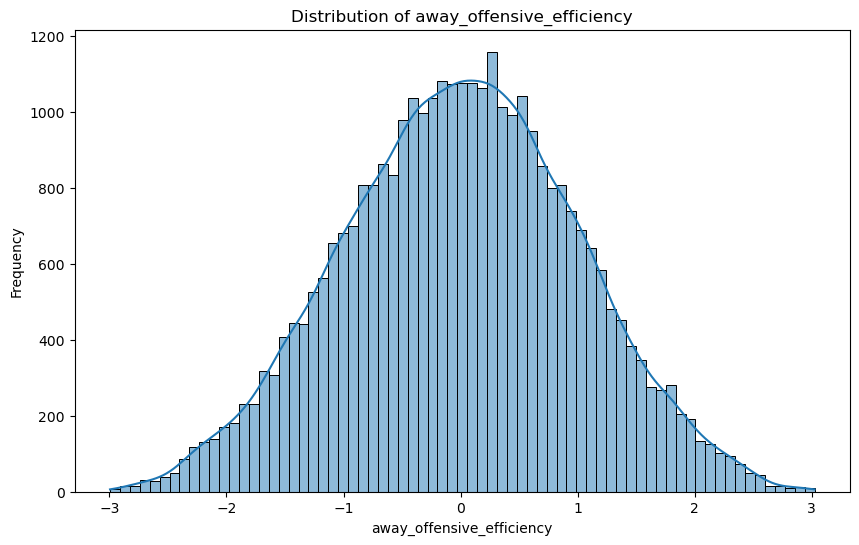

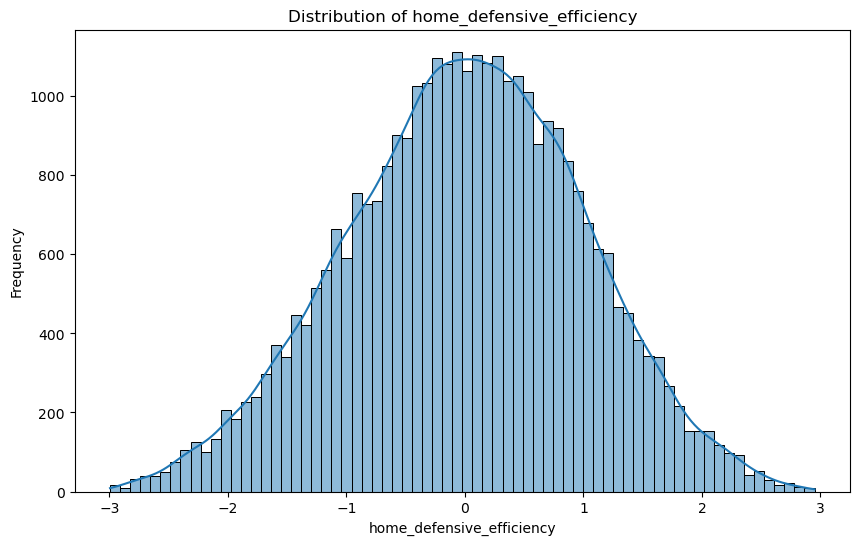

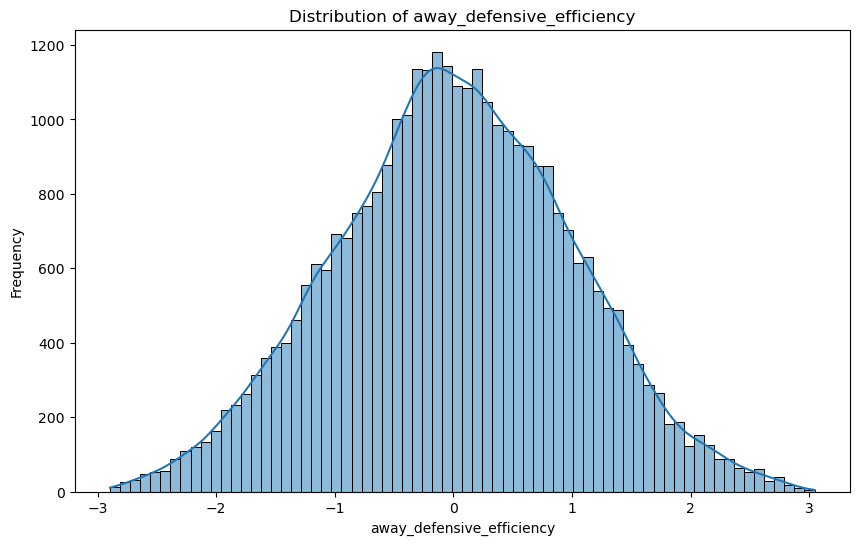

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'scHAdf' is the scaled DataFrame with your features
for column in scHAdf.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(scHAdf[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [229]:
scHAdf['home_rebounds_blocks_interaction'] = scHAdf['home_defensive_rebounds'] * scHAdf['home_blocks']
scHAdf['away_rebounds_blocks_interaction'] = scHAdf['away_defensive_rebounds'] * scHAdf['away_blocks']


In [277]:
train_df = HAdf[['point_differential' ,'home_offensive_efficiency',
       'away_offensive_efficiency', 'home_defensive_efficiency',
       'away_defensive_efficiency']]

In [278]:
train_df.to_csv('/Users/colesprouse/Desktop/Projects/Personal Projects/sports_modeling/data/train_df.csv')

### Feature Importance

In [230]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define your features and target variable
X = scHAdf.drop(['point_differential','total_points','away_points_game','home_points_game'], axis=1)  # or any other target variable you have
y = scHAdf['point_differential']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)


feature_importances = rf.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame to see which features have the least importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=True)


plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


threshold = 0.01  # This is an example threshold, adjust it according to your results
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

# Subset your DataFrame to include only important features
X_important_train = X_train[important_features]
X_important_test = X_test[important_features]


rf_important = RandomForestRegressor(n_estimators=100, random_state=42)
rf_important.fit(X_important_train, y_train)

# Make predictions
important_predictions = rf_important.predict(X_important_test)

# Compute the new MSE and compare it to the old one
new_mse = mean_squared_error(y_test, important_predictions)
print(f'New Mean Squared Error: {new_mse}')


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Define your model, in this case a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Define your features and target variable after dropping less important features
X_important = scHAdf[important_features]  # Assuming 'important_features' are the features you retained
y = scHAdf['point_differential']  # Or your target variable
# Select important features for the final model training
# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(model, X_important, y, cv=k, scoring='neg_mean_squared_error')

# The 'cross_val_score' function by default returns negative scores for MSE because it follows a convention
# where higher score values are better than lower ones. Since we want MSE, we'll negate the scores.
mse_scores = -cv_scores

# Calculate RMSE for each fold
rmse_scores = np.sqrt(mse_scores)

# Print the average RMSE across all k-folds
print(f'Average RMSE from {k}-fold cross-validation: {np.mean(rmse_scores)}')


RandomForestRegressor(random_state=42)

In [243]:
new_input_df = pd.read_csv('/Users/colesprouse/Desktop/Projects/Personal Projects/sports_modeling/data/11_15Final.csv')


In [245]:
new_input_df.drop('Unnamed: 0',axis=1,inplace=True)

In [251]:
new_input_df.head()

,home_team,away_team,home_point_spread,home_offensive_efficiency,home_defensive_efficiency,away_offensive_efficiency,away_defensive_efficiency
0,Ohio State,Merrimack,-23.5,110.958066,111.723294,109.917687,102.389078
1,Nebraska,Stony Brook,-16.0,110.478580,75.260517,109.615385,108.173077
2,Houston Christian,Florida International,13.0,77.739388,135.735439,93.631265,114.438212
3,BYU,Southeastern Louisiana,-22.5,NaN,NaN,109.583447,106.860877
4,Seattle U,Northern Arizona,-13.5,NaN,NaN,76.494138,131.541321


In [253]:
new_input_df

,home_team,away_team,home_point_spread,home_offensive_efficiency,home_defensive_efficiency,away_offensive_efficiency,away_defensive_efficiency
0,Ohio State,Merrimack,-23.5,110.958066,111.723294,109.917687,102.389078
1,Nebraska,Stony Brook,-16.0,110.478580,75.260517,109.615385,108.173077
2,Houston Christian,Florida International,13.0,77.739388,135.735439,93.631265,114.438212
3,BYU,Southeastern Louisiana,-22.5,NaN,NaN,109.583447,106.860877
4,Seattle U,Northern Arizona,-13.5,NaN,NaN,76.494138,131.541321
5,Texas,Rice,-20.5,116.497054,76.995179,130.762411,107.860520
6,Duquesne,Princeton,-6.0,118.647235,99.028401,111.530003,100.534087
7,Illinois State,Eastern Illinois,-12.0,99.972610,93.125171,100.154083,103.043143
8,Cleveland State,Canisius,-10.0,126.380012,95.874492,106.091224,112.586605
9,Maryland-Eastern Shore,Longwood,9.0,103.699552,105.100897,126.465145,89.450956


In [262]:
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler to the training data


In [265]:
new_input_df.columns

Index(['home_team', 'away_team', 'home_point_spread',
       'home_offensive_efficiency', 'home_defensive_efficiency',
       'away_offensive_efficiency', 'away_defensive_efficiency'],
      dtype='object')

In [267]:
# Select only the numeric columns to scale
numeric_columns = ['home_offensive_efficiency', 'home_defensive_efficiency',
                   'away_offensive_efficiency', 'away_defensive_efficiency']
numeric_data = new_input_df[numeric_columns]

# Apply the scaler to these numeric columns
sc_numeric_data = scaler.fit_transform(numeric_data)

# Create a DataFrame with the scaled numeric data
sc_numeric_df = pd.DataFrame(sc_numeric_data, columns=numeric_columns, index=new_input_df.index)

# Combine the scaled numeric data with the non-scaled columns
sc_input_df = new_input_df.drop(numeric_columns, axis=1).join(sc_numeric_df)


In [272]:
def predict_point_differential_and_evaluate_ev(input_df, trained_model):
    """
    Predicts the point differential and evaluates if the bet is +EV.

    :param input_df: DataFrame containing the features needed for prediction, including 'home_point_spread'
    :param trained_model: The trained machine learning model to use for predictions
    :param scaler: The scaler used to scale the training data
    :return: DataFrame with predictions and +EV evaluation
    """
    # Drop rows with NaN values
    input_df_cleaned = input_df.dropna()

    # Define the correct order of features (excluding 'home_point_spread')
    feature_order = ['home_defensive_efficiency', 'home_offensive_efficiency', 
                     'away_defensive_efficiency', 'away_offensive_efficiency']

    # Ensure the input DataFrame has the correct features
    if not set(feature_order).issubset(input_df_cleaned.columns):
        raise ValueError("Input DataFrame must contain all required features.")

    # Scale the features
    
    # Predict the point differential using the scaled features
    predicted_scaled = trained_model.predict(input_df_cleaned[feature_order])

    # If the target variable was scaled during training, unscale the predictions
    predicted_unscaled = predicted_scaled  # Assuming the target was not scaled; adjust if it was

    input_df_cleaned['predicted_point_differential'] = predicted_unscaled

    # Evaluate +EV based on the predicted point differential and the point spread
    input_df_cleaned['is_positive_ev'] = ((input_df_cleaned['home_point_spread'] < 0) & 
                                          (input_df_cleaned['predicted_point_differential'] < input_df_cleaned['home_point_spread'])) | \
                                         ((input_df_cleaned['home_point_spread'] > 0) & 
                                          (input_df_cleaned['predicted_point_differential'] > input_df_cleaned['home_point_spread']))

    # Include the home and away team names, predicted point differential, actual spread, and +EV evaluation
    return input_df_cleaned[['home_team', 'away_team', 'predicted_point_differential', 'home_point_spread', 'is_positive_ev']]

# Usage example:
result_df = predict_point_differential_and_evaluate_ev(input_df=sc_input_df, trained_model=rf_important)


/var/folders/zf/xwmjxb7n5nvfjg8yckhqkm380000gn/T/ipykernel_7324/3327306237.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df_cleaned['predicted_point_differential'] = predicted_unscaled
/var/folders/zf/xwmjxb7n5nvfjg8yckhqkm380000gn/T/ipykernel_7324/3327306237.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df_cleaned['is_positive_ev'] = ((input_df_cleaned['home_point_spread'] < 0) &


In [273]:
result_df

,home_team,away_team,predicted_point_differential,home_point_spread,is_positive_ev
0,Ohio State,Merrimack,-0.385967,-23.5,False
1,Nebraska,Stony Brook,0.332355,-16.0,False
2,Houston Christian,Florida International,1.456580,13.0,False
5,Texas,Rice,0.158168,-20.5,False
6,Duquesne,Princeton,0.230879,-6.0,False
7,Illinois State,Eastern Illinois,0.537704,-12.0,False
8,Cleveland State,Canisius,0.811769,-10.0,False
9,Maryland-Eastern Shore,Longwood,-1.222544,9.0,False
11,Louisville,Coppin State,2.468942,-17.5,False
12,Nevada,Pacific,0.389086,-13.0,False


In [237]:
import requests

In [242]:
soup

<!DOCTYPE html>

<html class="" lang="en" xmlns:fb="http://ogp.me/ns/fb#" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="en" http-equiv="Content-Language"/>
<meta content="notranslate" name="google"/>
<link href="https://sportshub.cbsistatic.com" rel="preconnect dns-prefetch"/>
<link href="https://sportsfly.cbsistatic.com" rel="preconnect dns-prefetch"/>
<link href="https://sports.cbsimg.net" rel="preconnect dns-prefetch"/>
<title>2023-24 College Basketball Complete Stats - Scoring - CBSSports.com</title>
<meta content="2023-24 College Basketball Complete Stats - Scoring - CBSSports.com" itemprop="name"/>
<meta content="Get the latest stats for College Basketball on CBS Sports. News, scores, and statistics for your favorite teams and players throughout the 2023-24 season." name="description"/>
<meta content="Get the latest stats fo